## Robot Learning

## Assignment 5

#### Group names: Edit this cell and write your names here

### Task 19

In the programming task on last weeks assignment sheet you obtained state values for a given policy using either Monte Carlo or TD policy evaluation. Suppose you would like to create a policy which is greedy w.r.t. these state values. How would you proceed? Are there any further terms that you would require? 

<div style="text-align: right; font-weight:bold"> 4 Points </div>

Please answer here.

### Task 20

Please regard the following pseudocode for the Sarsa($\lambda$) algorithm, taken from the html version of the first edition of "Reinforcement Learning: An Introduction" by Barto and Sutton.

<img src="helpers/sarsa_lambda_wrong.PNG" alt="Sarsa Lambda" title="Sarsa Lambda" width="650"/>

Note that the eligibility traces $e(s,a)$ are not reset to zero after each episode. Explain why this is an error in the pseudocode and a reset of the eligibility after each episode is indeed necessary.

<div style="text-align: right; font-weight:bold"> 4 Points </div>



That the eligibility traces $e(s,a)$ are not reset to zero after each episode is an error in the pseudocode because: \
In the Sarsa($\lambda$) algorithm we want to reward the states which we visited in the episode. The eligibility traces $e(s,a)$ save the state-action pairs.$ \ $
If we don't reset the values at the beginning of each episode, its an error because we still have the action done from the previous episode. That's a problem because the action done in the new episode could reward actions from the previous episode. \
A reset of the eligibility after each episode is necessary because then we do not have the problem described earlier. A reset is necessary because otherwise an action in the new episode could affect previous episodes.



Also we want all episodes to contribute equally while finding the optimal Q values. If e was not reset to 0, since e's keep getting scaled down by a factor of gamma*lambda we get that the contribution of later episodes to the Q values will be smaller than that of the earlier epsiodes. 





### Task 21

Recall the following $18 \times 14$ grid world, which represents a section of a racetrack with a sharp right turn after a lane narrow.

<img src="helpers/racetrack.png" alt="Grid World" title="Grid World" width="650"/>

The agent enters the section on one of the blue cells at the bottom. Its initial velocity is one cell per time step into the upward direction.

Actions are to increase or decrease its velocity components by one or to leave it unchanged. To clarify, the actions are not to set a velocity, but to accelerate or decelerate. The velocity is thus part of the agent's state, the available actions are accelerations within the physical limitations of the vehicle that the agent is driving.

Both velocity components are restricted to be nonnegative and their sum must be at least 1 and cannot exceed 5. This constrains the available actions based on the agent's current velocity.

The rewards are −1 for each step that the agent stays on the track, which is colored green. The reward is −10 if the agent drives into the crash barriers marked in red. 

The episode ends when the agent crashes or when it succesfully exits the section by driving onto the blue line at the top-right of the grid.

You are given some information for this environment. Please find it in the data structures below.

In [82]:
import numpy as np
import matplotlib.pyplot as plt

racetrack = -10. * np.ones((18,14))

circuit =   [(1,x) for x in np.arange(5,13)] + \
            [(2,x) for x in np.arange(4,13)] + \
            [(3,x) for x in np.arange(3,13)] + \
            [(4,x) for x in np.arange(3,13)] + \
            [(5,x) for x in np.arange(3,13)] + \
            [(6,x) for x in np.arange(3,11)] + \
            [(7,x) for x in np.arange(3,9)] + \
            [(8,x) for x in np.arange(3,8)] + \
            [(9,x) for x in np.arange(3,8)] + \
            [(10,x) for x in np.arange(3,8)] + \
            [(11,x) for x in np.arange(4,8)] + \
            [(12,x) for x in np.arange(4,8)] + \
            [(13,x) for x in np.arange(4,7)] + \
            [(14,x) for x in np.arange(4,7)] + \
            [(15,x) for x in np.arange(2,7)] + \
            [(16,x) for x in np.arange(2,7)]
            

for cell in circuit:
    racetrack[cell] = -1.

finishLine = [(y,13) for y in np.arange(1,6)]

for cell in finishLine:
    racetrack[cell] = 0.

startingGrid = [(17,x) for x in np.arange(2,7)]

for cell in startingGrid:
    racetrack[cell] = -1.

Also, please familiarize yourself with the provided racetrack environment class and helper functions by examining the example episode below, which is played by an agent that makes random decisions at each time step.

[0 4 5 6 7]
[0 2 3 4 5 6 7 8]
[0 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7 8]


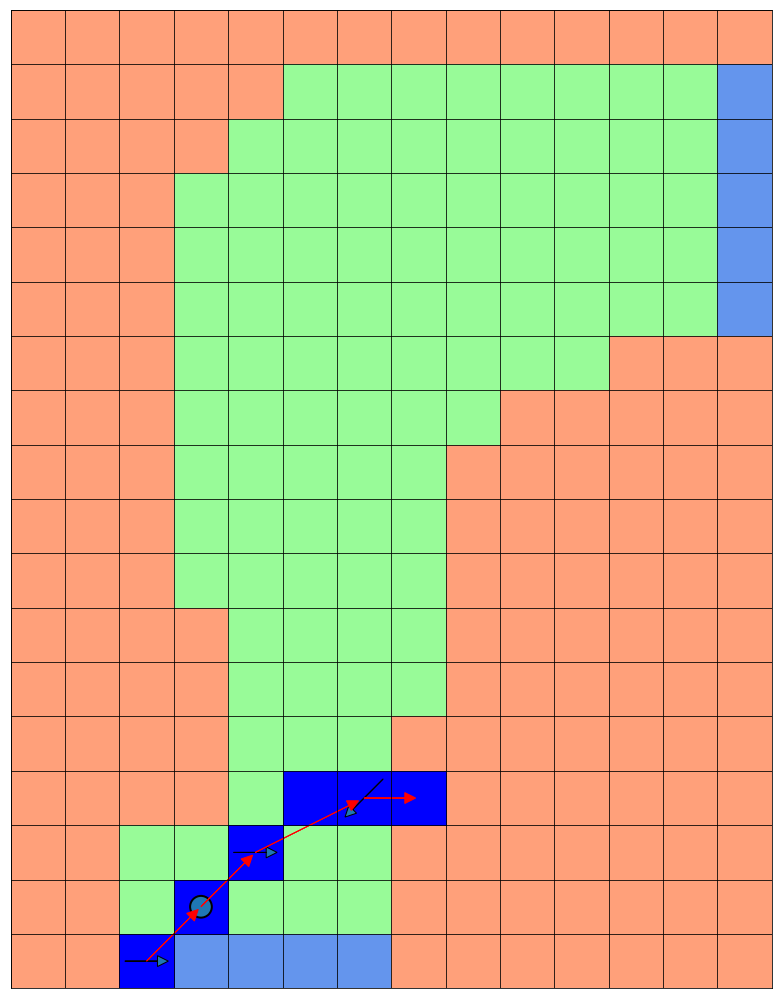

In [83]:
# get the required helper class and visualization function
from utils import env, drawTrajectory

# this makes sure that our description of the episode visualization makes sense
#np.random.seed(321)

# create a racing environment
racer = env()
# reset the agent to one of the 4 starting cells at random
# do this before each new episode
racer.reset()
# you can also manually set the agent position if you want to examine its behaviour there
racer.setPosition(17,2)
# create flag tracking whether the episode is over
done = False

# create lists to save the trajectory and the decisions of the agent
actions = []
moves = []
velocities = []

# these methods do what you would expect
# v is an integer in [0, 35] representing a velocity
# y, x are both integers, together, they represent the agents location
v = racer.getVelocity()
y, x = racer.getPosition()

# simulate until the episode is over
while not done:
    # which actions are possible at the current velocity?
    # the actions are integers in [0,8]
    possibleActions = racer.getAvailableActions()
    # select one of them randomly
    a = np.random.choice(possibleActions)
    print(possibleActions)
    # save the action
    actions.append(a)
    # execute the action using the step function
    # y, x, v are new positions and velocities
    # done is the flag whether the episode is over
    # travel details exactly which cells the agent traveled through
    y, x, v, r, done, travel = racer.step(action = a)
    # save the velocities
    velocities.append(v)
    # save the cells that the agent most recently passed through
    # they are only needed for visualization
    moves.append(travel)

# use the helper function to display how the episode went
drawTrajectory(moves, actions, velocities)

As an output to the cell above, you get a visualization of the agent's path through the race track section. You can see several cells marked in dark blue. These are the grid cells that the agent passed through. Between two time steps, they are calculated by a line drawing algorithm given the current position and velocity of the agent, as well as the acceleration it selected. This acceleration is represented by the arrows with the blue tips. In some cases, a cell will instead contain a circle. This represents the action of no acceleration or deceleration at all, which means that the velocity stays the same as in the previous time step. The red arrows show the velocity of the agent at a certain step after the acceleration the agent selected is added to it. For example, at the very start, the agent has the initial velocity of one cell per step towards the top of the grid. However, it chooses to decelerate in y direction and accelerate towards the right. Thus, the resulting velocity, represented by the first red arrow, points towards the right. Unfortunately, the agent in this episode did not slow down on time and the episode ends in a crash into the barriers at the top of the grid.

#### Now to the task: 

Compute an optimal policy  $\pi^*(s,a)$  for an agent on the racetrack (obstacle cells do not matter) using either Sarsa *or* Q-Learning (your choice!). Make sure to only use admissible actions at each timestep (*env.getAvailableActions()*). To verify your algorithm, show one trajectory beginning in each of the 5 starting positions. For this purpose you can use *env.setPosition(y,x)* at the beginning of an episode. Depending on your algorithm, decide whether you want to deactivate exploratory actions before presenting your agent's behaviour. Please also report the cumulative moving average episode return during training in a plot. 


<div style="text-align: right; font-weight:bold"> 8 Points </div>

In [91]:
def epsilonGreedy(Q,y,x,v,possibleActions,epsilon):
    #Chooses random action with probability epsilon
    if np.random.rand(1) < epsilon:
        a = np.random.choice(possibleActions)
    else:
        #Pick an action randomly from the set of all possible optimal actions
        optimalQvalue = np.max(Q[y,x,v,possibleActions])
        optimalActions = possibleActions[np.where(Q[y,x,v,possibleActions] == optimalQvalue)[0]]
        a = np.random.choice(optimalActions)
        
        #a = possibleActions[np.argmax(Q[y,x,v,possibleActions])]
        
    return a
    


In [92]:
#Hyperparameters
#These were determined after some experimentation 
noEpisodes = 20000
gamma = 0.9 #represents how much future rewards matters wrt to current rewards
epsilon = 0.3 #exploration vs exploitation
alpha = 0.2 #Weightage for new rewards vs old rewards



Episode No 0
Step No 1
Step No 2
Episode No 1
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 3
Step No 1
Episode No 4
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5
Step No 1
Step No 2
Episode No 6
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 7
Step No 1
Step No 2
Step No 3
Episode No 8
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 10
Step No 1
Step No 2
Episode No 11
Step No 1
Episode No 12
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 14
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 15
Step No 1
Step No 2
Step No 3
Episode No 16
Step No 1
Episode No 17
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 18
Step No 1
Step No 2
Episode No 19


Episode No 152
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 153
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 154
Step No 1
Step No 2
Step No 3
Episode No 155
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 156
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 157
Step No 1
Step No 2
Episode No 158
Step No 1
Step No 2
Step No 3
Episode No 159
Step No 1
Step No 2
Episode No 160
Step No 1
Step No 2
Episode No 161
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 162
Step No 1
Step No 2
Step No 3
Episode No 163
Step No 1
Step No 2
Step No 3
Episode No 164
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 165
Step No 1
Step No 2
Episode No 166
Step No 1
Step No 2
Step No 3
Episode No 167
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 168
Step No 1
Episode No 169
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 

Step No 4
Step No 5
Step No 6
Episode No 325
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 326
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 327
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 328
Step No 1
Step No 2
Episode No 329
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 330
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 331
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 332
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 333
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 334
Step No 1
Step No 2
Episode No 335
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 336
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 337
Step No 1
Step No 2
Step No 3
Episode N

Episode No 554
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 555
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 556
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 557
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 558
Step No 1
Episode No 559
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 560
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 561
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 562
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 563
Step No 1
Step No 2
Episode No 564
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 565
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 566
Step N

Step No 5
Episode No 697
Step No 1
Step No 2
Episode No 698
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 699
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 700
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 701
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 702
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 703
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 704
Step No 1
Step No 2
Episode No 705
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 706
Step No 1
Step No 2
Episode No 707
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 708
Step No 1
Step No 2
Step No 3
Episode No 709
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 710
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 711
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 712
Step No 1
Step No 2
Step No 3


Step No 10
Step No 11
Step No 12
Step No 13
Episode No 814
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 815
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 816
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 817
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 818
Step No 1
Step No 2
Step No 3
Episode No 819
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 820
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 821
Step No 1
Step No 2
Step No 3
Episode No 822
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 823
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 824
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 8

Step No 5
Step No 6
Episode No 929
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 930
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 931
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 932
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 933
Step No 1
Step No 2
Step No 3
Episode No 934
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 935
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 936
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 937
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 938
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 939
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 940
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 941
S

Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 1049
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1050
Step No 1
Step No 2
Episode No 1051
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 1052
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1053
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1054
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 1055
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 1056
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Step No 15
Step No 16
Episode No 1057
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1058
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1250
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1251
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1252
Step No 1
Step No 2
Step No 3
Episode No 1253
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 1254
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 1255
Step No 1
Step No 2
Step No 3
Episode No 1256
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 1257
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 1258
Step No 1
Step No 2
Episode No 1259
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 1260
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1261
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 1262
Step No 1
Step No 2

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 1366
Step No 1
Step No 2
Step No 3
Episode No 1367
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 1368
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 1369
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1370
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 1371
Step No 1
Episode No 1372
Step No 1
Episode No 1373
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 1374
Step No 1
Step No 2
Step No 3
Episode No 1375
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1376
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1377
Step No 1
Step No 2
Episode No 1378
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 1379
Step No 1
Step No 2
S

Episode No 1542
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 1543
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1544
Step No 1
Step No 2
Episode No 1545
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1546
Step No 1
Step No 2
Step No 3
Episode No 1547
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 1548
Step No 1
Step No 2
Episode No 1549
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 1550
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1551
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 1552
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 1553
Step No 1
Step No 2
Episode No 1554
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1555
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1556
Step No 1
Step No 2
Step No 3
Step No 4


Episode No 1743
Step No 1
Step No 2
Step No 3
Episode No 1744
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1745
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1746
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 1747
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 1748
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1749
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 1750
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1751
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1752
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 1753
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7


Episode No 1931
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1932
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 1933
Step No 1
Step No 2
Episode No 1934
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 1935
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1936
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 1937
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 1938
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 1939
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1940
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Step No 15
Step No 16
Step No 

Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2037
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 2038
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 2039
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2040
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2041
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 2042
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2043
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2044
Step No 1
Episode No 2045
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2046
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 2047
Step No 1
Step No 2
Step No 3

Episode No 2231
Step No 1
Episode No 2232
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2233
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2234
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 2235
Step No 1
Episode No 2236
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 2237
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2238
Step No 1
Step No 2
Episode No 2239
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2240
Step No 1
Step No 2
Episode No 2241
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2242
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2243
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2244
Step No 1
Step No 2
Step No 3
Step No 4
Epis

Step No 5
Step No 6
Step No 7
Episode No 2349
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2350
Step No 1
Step No 2
Step No 3
Episode No 2351
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 2352
Step No 1
Episode No 2353
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 2354
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2355
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2356
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 2357
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2358
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2359
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 2360
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2361
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2362
Step 

Step No 14
Step No 15
Episode No 2544
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2545
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2546
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2547
Step No 1
Step No 2
Episode No 2548
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2549
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2550
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 2551
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2552
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 2553
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 2554
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episod

Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2650
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2651
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2652
Step No 1
Step No 2
Step No 3
Episode No 2653
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 2654
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2655
Step No 1
Episode No 2656
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2657
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2658
Step No 1
Step No 2
Step No 3
Episode No 2659
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2660
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2661
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Epis

Step No 3
Step No 4
Step No 5
Episode No 2830
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2831
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 2832
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2833
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2834
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 2835
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2836
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Step No 15
Episode No 2837
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2838
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 2839
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
St

Step No 2
Episode No 2925
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2926
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2927
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2928
Step No 1
Step No 2
Step No 3
Episode No 2929
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2930
Step No 1
Episode No 2931
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2932
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 2933
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2934
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2935
Step No 1
Step No 2
Episode No 2936
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2937
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
St

Episode No 3034
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3035
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3036
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 3037
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 3038
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3039
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3040
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 3041
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 3042
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3043
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 3044
Step 

Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3228
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3229
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3230
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3231
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 3232
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3233
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3234
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3235
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 3236
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 3237
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3238
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
S

Step No 4
Step No 5
Episode No 3446
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 3447
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3448
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3449
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3450
Step No 1
Step No 2
Episode No 3451
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3452
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3453
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3454
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3455
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 3456
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3457
Step No 1
Step 

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3628
Step No 1
Step No 2
Episode No 3629
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3630
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 3631
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3632
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3633
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3634
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3635
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3636
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3637
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episo

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3733
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3734
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3735
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3736
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3737
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3738
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3739
Step No 1
Step No 2
Step No 3
Episode No 3740
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 3741
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3742
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode

Step No 8
Step No 9
Episode No 3915
Step No 1
Step No 2
Episode No 3916
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 3917
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 3918
Step No 1
Step No 2
Step No 3
Episode No 3919
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 3920
Step No 1
Episode No 3921
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3922
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3923
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3924
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3925
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3926
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3927
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 3

Episode No 4032
Step No 1
Episode No 4033
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4034
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4035
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4036
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4037
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4038
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4039
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4040
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4041
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4042
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4043
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4044
Step No 1
Episode No 4045
Step N

Step No 6
Episode No 4210
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4211
Step No 1
Step No 2
Step No 3
Episode No 4212
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4213
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 4214
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 4215
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4216
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4217
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4218
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4219
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4220
Step No 1
Step No 2
Episode No 4221
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4222
Step No 1
Step No 2
Step No 3


Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4329
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Step No 15
Episode No 4330
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4331
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4332
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4333
Step No 1
Step No 2
Episode No 4334
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 4335
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4336
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4337
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Ep

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4430
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4431
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4432
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4433
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4434
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4435
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 4436
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4437
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4438
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4439
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No

Step No 6
Step No 7
Episode No 4526
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4527
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 4528
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4529
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4530
Step No 1
Episode No 4531
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4532
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4533
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 4534
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 4535
Step No 1
Step No 2
Episode No 4536
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4537
Step No 1
Step No 2
St

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 4639
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 4640
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4641
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 4642
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 4643
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4644
Step No 1
Step No 2
Step No 3
Episode No 4645
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4646
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 4647
Step No 1
Step No 2
Episode No 4648
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 4649
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4650
Step No 1
S

Step No 5
Step No 6
Episode No 4734
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4735
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4736
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4737
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4738
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 4739
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 4740
Step No 1
Step No 2
Episode No 4741
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4742
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4743
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4744
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
S

Step No 7
Step No 8
Episode No 4841
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4842
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4843
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4844
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4845
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 4846
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4847
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4848
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4849
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4850
Step No 1
Episode No 4851
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 4852
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4940
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4941
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4942
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4943
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4944
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4945
Step No 1
Step No 2
Step No 3
Episode No 4946
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 4947
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4948
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4949
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4950
Step No 1
Step No 2
E

Step No 5
Step No 6
Episode No 5046
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5047
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 5048
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 5049
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5050
Step No 1
Step No 2
Step No 3
Episode No 5051
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5052
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 5053
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5054
Step No 1
Episode No 5055
Step No 1
Step No 2
Episode No 5056
Step No 1
Step No 2
Episode No 5057
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5058
Step No 1
Step No 2
Step N

Step No 8
Episode No 5152
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5153
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5154
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 5155
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5156
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 5157
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 5158
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 5159
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5160
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5161
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 516

Episode No 5271
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 5272
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5273
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5274
Step No 1
Step No 2
Episode No 5275
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5276
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5277
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5278
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 5279
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5280
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 5281
Step No 1
Step No 2
Episode No 5282
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5283
Step No 1
Episode No 5284
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5285
Step No 1
Step No 2
Step No 3


Step No 11
Step No 12
Step No 13
Episode No 5476
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5477
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5478
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5479
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 5480
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5481
Step No 1
Step No 2
Episode No 5482
Step No 1
Episode No 5483
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 5484
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5485
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Step No 1

Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5588
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5589
Step No 1
Step No 2
Episode No 5590
Step No 1
Episode No 5591
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 5592
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 5593
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 5594
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 5595
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5596
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5597
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 5598
Step No 1
Step No

Step No 2
Step No 3
Step No 4
Episode No 5770
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5771
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 5772
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5773
Step No 1
Step No 2
Episode No 5774
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5775
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5776
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5777
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 5778
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5779
Step No 1
Step No 2
Step No 3
Episode No 5780
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 5781
S

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5954
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5955
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5956
Step No 1
Step No 2
Episode No 5957
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 5958
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5959
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5960
Step No 1
Episode No 5961
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5962
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 5963
Step No 1
Step No 2
Episode No 5964
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5965
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5966
Step No 1
Step No 2
Step No 3
Episode No 5967
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5968

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 6057
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6058
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6059
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6060
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6061
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6062
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 6063
Step No 1
Episode No 6064
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6065
Step No 1
Step No 2
Step No 3
Episode No 6066
Step No 1
Episode No 6067
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 6068
Step No 1
Ste

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6145
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6146
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6147
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 6148
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6149
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6150
Step No 1
Episode No 6151
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 6152
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6153
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6154
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6155
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 6156
Step No 1
Step No 2
Step N

Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 6258
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6259
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6260
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6261
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6262
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 6263
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6264
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6265
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6266
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6267
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No

Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 6349
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 6350
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6351
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6352
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6353
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6354
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 6355
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6356
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6357
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 6358
Step No 1
Step No 2
Step No 3
Step No 4
Ste

Step No 1
Step No 2
Step No 3
Episode No 6562
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6563
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6564
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 6565
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 6566
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6567
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6568
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6569
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 6570
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6571
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6572
Step No 1
Step No 2
S

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6725
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6726
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 6727
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Step No 15
Episode No 6728
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 6729
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6730
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6731
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6732
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6733
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 6734
Step No 1
S

Step No 5
Step No 6
Step No 7
Episode No 6890
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6891
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6892
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 6893
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6894
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6895
Step No 1
Step No 2
Step No 3
Episode No 6896
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6897
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 6898
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6899
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6900
Step No 1
Step No 2
Step No 3
Episode No 6901
Step No 1
Step No 2
Step 

Step No 4
Step No 5
Step No 6
Episode No 7009
Step No 1
Episode No 7010
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 7011
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 7012
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 7013
Step No 1
Step No 2
Step No 3
Episode No 7014
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7015
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7016
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7017
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 7018
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7019
Step N

Step No 7
Step No 8
Episode No 7192
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7193
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7194
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Step No 15
Step No 16
Episode No 7195
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7196
Step No 1
Step No 2
Episode No 7197
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 7198
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7199
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7200
Step No 1
Step No 2
Step No 3
Episode No 7201
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
St

Step No 6
Episode No 7300
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7301
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 7302
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 7303
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7304
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7305
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7306
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7307
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7308
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 7309
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7310
Step No 

Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 7395
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7396
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7397
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 7398
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7399
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7400
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7401
Step No 1
Step No 2
Episode No 7402
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 7403
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7404
Step No 1
Step No 2
Step No 3
Episode No 7405
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 7406
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7407
Step No 

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7491
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7492
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7493
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7494
Step No 1
Step No 2
Episode No 7495
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 7496
Step No 1
Step No 2
Episode No 7497
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 7498
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7499
Step No 1
Step No 2
Episode No 7500
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 7501
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7502
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7503
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
St

Episode No 7586
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7587
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7588
Step No 1
Step No 2
Episode No 7589
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 7590
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7591
Step No 1
Step No 2
Step No 3
Episode No 7592
Step No 1
Episode No 7593
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 7594
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 7595
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 7596
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7597
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7598
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 7599
Step No 1
Step No 2
Step No 3
Step

Episode No 7689
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 7690
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7691
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7692
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7693
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7694
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 7695
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 7696
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 7697
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7698
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7699
Step No 1
Step No 

Step No 6
Step No 7
Episode No 7865
Step No 1
Step No 2
Episode No 7866
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 7867
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 7868
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7869
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7870
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7871
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 7872
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7873
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7874
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7875
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6

Step No 4
Step No 5
Step No 6
Episode No 8052
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8053
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 8054
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 8055
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8056
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8057
Step No 1
Step No 2
Step No 3
Episode No 8058
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8059
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8060
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8061
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 8062
Step No 1
Step No 2


Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8237
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8238
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8239
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 8240
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 8241
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8242
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8243
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8244
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 8245
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8246
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
St

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8412
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 8413
Step No 1
Step No 2
Step No 3
Episode No 8414
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8415
Step No 1
Episode No 8416
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8417
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8418
Step No 1
Step No 2
Episode No 8419
Step No 1
Step No 2
Step No 3
Episode No 8420
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8421
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 8422
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8423
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8599
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 8600
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8601
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8602
Step No 1
Step No 2
Episode No 8603
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8604
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8605
Step No 1
Episode No 8606
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8607
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8608
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 8609
Step No 1
Episode No 8610
Step No 1
Step No 2
Step No 3
Episode No 8611
Step No 1
Step No 2
Step No

Step No 9
Episode No 8718
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8719
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 8720
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8721
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8722
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8723
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 8724
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8725
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8726
Step No 1
Step No 2
Episode No 8727
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8728
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8729
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8730
Step No 1
S

Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8907
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8908
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 8909
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8910
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8911
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 8912
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8913
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8914
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8915
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8916
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 8917
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Ste

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9093
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9094
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 9095
Step No 1
Step No 2
Episode No 9096
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 9097
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9098
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9099
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9100
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9101
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9102
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9103
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Epi

Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9210
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 9211
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9212
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9213
Step No 1
Episode No 9214
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9215
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9216
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9217
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9218
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9219
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9220
Step No 1
Step No 2
Episode No 9221
Step No 1
Step No 2
Step No 3
Step No

Episode No 9362
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 9363
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9364
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 9365
Step No 1
Step No 2
Episode No 9366
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9367
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 9368
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9369
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9370
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9371
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9372
Step No 1
Step No 2

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 9557
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9558
Step No 1
Step No 2
Step No 3
Episode No 9559
Step No 1
Step No 2
Episode No 9560
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9561
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9562
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9563
Step No 1
Step No 2
Episode No 9564
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9565
Step No 1
Step No 2
Step No 3
Episode No 9566
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 9567
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9568
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 9569
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
E

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9656
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9657
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9658
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9659
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9660
Step No 1
Step No 2
Step No 3
Episode No 9661
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9662
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9663
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 9664
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9665
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9666
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Ste

Episode No 9837
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 9838
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 9839
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9840
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9841
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9842
Step No 1
Step No 2
Episode No 9843
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9844
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 9845
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9846
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9847
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 9848
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 9849
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
S

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10025
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 10026
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10027
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 10028
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10029
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10030
Step No 1
Step No 2
Step No 3
Episode No 10031
Step No 1
Step No 2
Episode No 10032
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 10033
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 10034
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 10035
Step No 1
Step No 2
Step No 

Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 10128
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10129
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10130
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10131
Step No 1
Episode No 10132
Step No 1
Step No 2
Episode No 10133
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10134
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10135
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 10136
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 10137
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10138
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10139
Step No 1
Episode No 10140
Step N

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 10236
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 10237
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 10238
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 10239
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10240
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10241
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10242
Step No 1
Step No 2
Step No 3
Episode No 10243
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 10244
Step No 1
Step No 2
Step No 3
Episode No 10245
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Epi

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10342
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10343
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10344
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 10345
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10346
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 10347
Step No 1
Step No 2
Step No 3
Episode No 10348
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 10349
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 10350
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 10351
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10352
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Ep

Episode No 10545
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10546
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10547
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 10548
Step No 1
Step No 2
Episode No 10549
Step No 1
Step No 2
Step No 3
Episode No 10550
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 10551
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 10552
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10553
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10554
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10555
Step No 1
Episode No 10556
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10557
Step No 1
Episode No 10558
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
S

Episode No 10742
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10743
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 10744
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10745
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 10746
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 10747
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10748
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10749
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10750
Step No 1
Step No 2
Episode No 10751
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 10752
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10753
Step No 1
Step No 2

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 10843
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 10844
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10845
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 10846
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10847
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10848
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10849
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10850
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10851
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10852
St

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10937
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10938
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 10939
Step No 1
Episode No 10940
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10941
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10942
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 10943
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 10944
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10945
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10946
Step No 1
Episode No 10947
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10948
Step No 1
Step No 2
Episode No 10

Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 11032
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11033
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11034
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 11035
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 11036
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11037
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11038
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 11039
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11040
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 11041
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11042
Step No 1
Episode No 11043
Step No 1
Episode No 11044
Step No 1
Step No 

Step No 9
Episode No 11239
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 11240
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 11241
Step No 1
Step No 2
Step No 3
Episode No 11242
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11243
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11244
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11245
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11246
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 11247
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11248
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11249
Step No 1
Step No 2
Step No 3
S

Step No 7
Episode No 11336
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11337
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11338
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11339
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 11340
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11341
Step No 1
Step No 2
Step No 3
Episode No 11342
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11343
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11344
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11345
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11346
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
E

Episode No 11438
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 11439
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 11440
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11441
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11442
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11443
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11444
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 11445
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11446
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 11447
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step N

Episode No 11541
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11542
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11543
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 11544
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11545
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 11546
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11547
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11548
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 11549
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 11550
Step No 1
Step No 2
Step No 3
Episode No 11551
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11552
Step No 1
Epis

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11719
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11720
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11721
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11722
Step No 1
Episode No 11723
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 11724
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11725
Step No 1
Step No 2
Step No 3
Episode No 11726
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11727
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11728
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11729
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11730
Step No 1
Step No 2
Step N

Step No 5
Step No 6
Step No 7
Episode No 11829
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11830
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11831
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11832
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 11833
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 11834
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 11835
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11836
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11837
Step No 1
Episode No 11838
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 118

Step No 7
Episode No 11975
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11976
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11977
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11978
Step No 1
Step No 2
Episode No 11979
Step No 1
Episode No 11980
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11981
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11982
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 11983
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11984
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11985
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 11986
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step N

Episode No 12085
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 12086
Step No 1
Step No 2
Step No 3
Episode No 12087
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12088
Step No 1
Episode No 12089
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 12090
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12091
Step No 1
Step No 2
Step No 3
Episode No 12092
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12093
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Step No 15
Episode No 12094
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12095
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12096
Step No 1
Step No 2
Step No 3
Episode No 12097
Step No 1
St

Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 12287
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12288
Step No 1
Step No 2
Episode No 12289
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 12290
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 12291
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 12292
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12293
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12294
Step No 1
Step No 2
Step No 3
Episode No 12295
Step No 1
Episode No 12296
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12297
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12298
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12299
Step No

Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 12394
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12395
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 12396
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12397
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12398
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12399
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 12400
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 12401
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12402
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12403
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12

Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 12495
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12496
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12497
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12498
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12499
Step No 1
Step No 2
Episode No 12500
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12501
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12502
Step No 1
Step No 2
Episode No 12503
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12504
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12505
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 12506
Step No 1
Step No 2
Ste

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12594
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12595
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12596
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 12597
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12598
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12599
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12600
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12601
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12602
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12603
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12604
Step No 1
Step No 2
Episode No 12605
Step N

Episode No 12693
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12694
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 12695
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12696
Step No 1
Step No 2
Episode No 12697
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12698
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12699
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12700
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 12701
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12702
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12703
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 12704
Step No 1
Step No 2
Step No 3
Step

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12792
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12793
Step No 1
Step No 2
Episode No 12794
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12795
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12796
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12797
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12798
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12799
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12800
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12801
Step No 1
Step No 2
Episode No 12802
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12803
Step N

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12905
Step No 1
Step No 2
Episode No 12906
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12907
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12908
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12909
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12910
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12911
Step No 1
Episode No 12912
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 12913
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12914
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12915
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 1

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 13004
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 13005
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13006
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 13007
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13008
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 13009
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 13010
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13011
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13012
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13013
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 13014
Step No 1
Step No 

Step No 11
Step No 12
Episode No 13116
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13117
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13118
Step No 1
Step No 2
Step No 3
Episode No 13119
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13120
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13121
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 13122
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13123
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13124
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13125
Step No 1
Step No 2
Step No 3
Episode No 13126
Step No 1
Step No 2
Episode No 13127
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
St

Step No 6
Step No 7
Episode No 13226
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13227
Step No 1
Step No 2
Episode No 13228
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13229
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 13230
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13231
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13232
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13233
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13234
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13235
Step No 1
Episode No 13236
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13237
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step

Step No 5
Step No 6
Step No 7
Episode No 13320
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13321
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13322
Step No 1
Step No 2
Step No 3
Episode No 13323
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13324
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13325
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13326
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13327
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 13328
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13329
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13330
Step No 1
Step No 2
S

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13500
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13501
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 13502
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13503
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13504
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13505
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 13506
Step No 1
Step No 2
Episode No 13507
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 13508
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13509
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 13510
Step No 

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13635
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 13636
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13637
Step No 1
Step No 2
Step No 3
Episode No 13638
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 13639
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13640
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13641
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 13642
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13643
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 13644
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Ste

Step No 5
Episode No 13728
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13729
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 13730
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13731
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13732
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13733
Step No 1
Step No 2
Step No 3
Episode No 13734
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13735
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13736
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13737
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13738
Step No 1
Step No 2
Step No 3
S

Step No 10
Episode No 13830
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 13831
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13832
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13833
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13834
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13835
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13836
Step No 1
Episode No 13837
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13838
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13839
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13840
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13841
Step No 1
Step No 2
Step No 3
Step No 4
Step

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 13931
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13932
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13933
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13934
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13935
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 13936
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13937
Step No 1
Episode No 13938
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13939
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13940
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13941
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13942
Step No 1
Step No 2
Step No 3
Step

Step No 13
Episode No 14030
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14031
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 14032
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14033
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14034
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 14035
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14036
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14037
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14038
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14039
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14040
Step No 1

Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14150
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 14151
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14152
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14153
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14154
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14155
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14156
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14157
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14158
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14159
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step N

Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14346
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14347
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14348
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14349
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14350
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14351
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14352
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14353
Step No 1
Step No 2
Episode No 14354
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 14355
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14356
Step No 1
Step No 2
Step No 3


Step No 5
Step No 6
Step No 7
Episode No 14534
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14535
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14536
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14537
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 14538
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14539
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14540
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14541
Step No 1
Step No 2
Episode No 14542
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14543
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14544
Step No 1
Episode No 14545
St

Step No 5
Step No 6
Step No 7
Episode No 14714
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14715
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14716
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 14717
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 14718
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14719
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 14720
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14721
Step No 1
Step No 2
Step No 3
Episode No 14722
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14723
Step No 1
Step No 2
Step No 3
St

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 14809
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 14810
Step No 1
Step No 2
Step No 3
Episode No 14811
Step No 1
Step No 2
Episode No 14812
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14813
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14814
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14815
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 14816
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14817
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14818
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14819
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 

Step No 9
Step No 10
Episode No 14908
Step No 1
Episode No 14909
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 14910
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 14911
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14912
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14913
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14914
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 14915
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14916
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 14917
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 14918
Step N

Step No 8
Step No 9
Episode No 15109
Step No 1
Episode No 15110
Step No 1
Step No 2
Step No 3
Episode No 15111
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15112
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 15113
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15114
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15115
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 15116
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15117
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 15118
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15119
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15120
Step

Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15209
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15210
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15211
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15212
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 15213
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15214
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 15215
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15216
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15217
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15218
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15219
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15220
Step N

Step No 7
Step No 8
Episode No 15399
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 15400
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 15401
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15402
Step No 1
Step No 2
Episode No 15403
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 15404
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15405
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 15406
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 15407
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15408
Step No 1
Step No 2
Step No 3
Ste

Step No 7
Step No 8
Step No 9
Episode No 15496
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15497
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15498
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15499
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15500
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 15501
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15502
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15503
Step No 1
Episode No 15504
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15505
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15506
Step No 1
Step No 2
Step No 3
Episode No 15507
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step

Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 15596
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15597
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15598
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15599
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 15600
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15601
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15602
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 15603
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15604
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15605
Step No 1
Step No 2
Episode No 15606
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15607
St

Step No 5
Step No 6
Step No 7
Episode No 15693
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 15694
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15695
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15696
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15697
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15698
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 15699
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15700
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 15701
Step No 1
Episode No 15702
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 15703
Step No 1
Step No 2
Step No 3
Step No 4
Step No

Episode No 15788
Step No 1
Step No 2
Episode No 15789
Step No 1
Step No 2
Episode No 15790
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15791
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15792
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15793
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 15794
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 15795
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15796
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 15797
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 15798
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 15799
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Ste

Episode No 15965
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15966
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15967
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15968
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15969
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15970
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15971
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 15972
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15973
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15974
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 15975
Step No 1
Step No 2
Step No 3
Step No

Step No 6
Step No 7
Step No 8
Episode No 16151
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16152
Step No 1
Episode No 16153
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16154
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 16155
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16156
Step No 1
Step No 2
Episode No 16157
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 16158
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 16159
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16160
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16161
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16162
Step No 1
Step No 2
Step No 3
Episode No 16163
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16164
S

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16257
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16258
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 16259
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16260
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16261
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 16262
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16263
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16264
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16265
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16266
Step No 1
Step No 2
Episode No 16267
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
St

Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16369
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16370
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16371
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 16372
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16373
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16374
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 16375
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16376
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16377
Step No 1
Episode No 16378
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Epis

Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16471
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 16472
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16473
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16474
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 16475
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16476
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16477
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 16478
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 16479
Step No 1
Step No 2
Episode No 16480
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16481
Step No 1
Step No 2

Step No 2
Episode No 16571
Step No 1
Step No 2
Episode No 16572
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 16573
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16574
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16575
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16576
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 16577
Step No 1
Step No 2
Step No 3
Episode No 16578
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 16579
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16580
Step No 1
Step No 2
Episode No 16581
Step No 1
Episode No 16582
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode 

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16755
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16756
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16757
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 16758
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16759
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 16760
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16761
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16762
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 16763
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Epis

Episode No 16939
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16940
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16941
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16942
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 16943
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16944
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16945
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16946
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16947
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16948
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16949
Step No 1
Step No 2


Step No 7
Step No 8
Step No 9
Episode No 17051
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17052
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17053
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17054
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17055
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17056
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17057
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17058
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17059
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17060
Step No 1
Step No 2
Step No 3
Episode No 17061
Step No 1
Step No 2
Step No 3
Ste

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 17195
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17196
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17197
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17198
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17199
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17200
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17201
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 17202
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17203
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17204
Step No 1
Episode No 17205


Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 17361
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 17362
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 17363
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17364
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 17365
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17366
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 17367
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17368
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 17369
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode 

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17459
Step No 1
Step No 2
Episode No 17460
Step No 1
Step No 2
Episode No 17461
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17462
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17463
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17464
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17465
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 17466
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 17467
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17468
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17469
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17470
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step 

Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17643
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17644
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17645
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 17646
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 17647
Step No 1
Episode No 17648
Step No 1
Step No 2
Episode No 17649
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17650
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17651
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17652
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Ste

Step No 8
Step No 9
Step No 10
Step No 11
Episode No 17794
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17795
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17796
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17797
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17798
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17799
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17800
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17801
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17802
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17803
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17804
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
S

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17960
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17961
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17962
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 17963
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17964
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 17965
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17966
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17967
Step No 1
Step No 2
Episode No 17968
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17969
Step No 1
Step No 2
Episode No 17970
Step No

Step No 8
Episode No 18159
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 18160
Step No 1
Step No 2
Episode No 18161
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18162
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18163
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18164
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18165
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18166
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 18167
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18168
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 18169
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18170
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step 

Episode No 18344
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18345
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18346
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 18347
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18348
Step No 1
Step No 2
Episode No 18349
Step No 1
Step No 2
Episode No 18350
Step No 1
Episode No 18351
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 18352
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18353
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18354
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18355
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18356
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18357
Step No 1
Episode No 18358
Step No 1
Episo

Step No 4
Step No 5
Step No 6
Episode No 18480
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18481
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18482
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18483
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18484
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18485
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 18486
Step No 1
Step No 2
Episode No 18487
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18488
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18489
Step No 1
Step No 2
Episode No 18490
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18491
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18492
Step No 1

Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18647
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18648
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18649
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18650
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18651
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 18652
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18653
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18654
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18655
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 18656
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 186

Step No 7
Episode No 18824
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18825
Step No 1
Step No 2
Step No 3
Episode No 18826
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18827
Step No 1
Step No 2
Episode No 18828
Step No 1
Step No 2
Step No 3
Episode No 18829
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18830
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 18831
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18832
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Step No 15
Step No 16
Episode No 18833
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18834
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19025
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19026
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19027
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 19028
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19029
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19030
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19031
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19032
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19033
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19034
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10

Step No 10
Episode No 19209
Step No 1
Episode No 19210
Step No 1
Step No 2
Step No 3
Episode No 19211
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19212
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19213
Step No 1
Episode No 19214
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19215
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 19216
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19217
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19218
Step No 1
Step No 2
Episode No 19219
Step No 1
Step No 2
Episode No 19220
Step No 1
Step No 2
Step No 3
Episode No 19221
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19222
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 19223
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step

Step No 11
Step No 12
Episode No 19388
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19389
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19390
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19391
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 19392
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19393
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19394
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 19395
Step No 1
Episode No 19396
Step No 1
Step No 2
Episode No 19397
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19398
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19399
Step No 1
Step No 2
St

Step No 8
Episode No 19568
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19569
Step No 1
Step No 2
Episode No 19570
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19571
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 19572
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 19573
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19574
Step No 1
Step No 2
Step No 3
Episode No 19575
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 19576
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 19577
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19578
Step No 1
Step No 2
Step N

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19725
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19726
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19727
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19728
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 19729
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 19730
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19731
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19732
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19733
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19734
Step No 1
Step No 2
Step No 3
Step N

Step No 4
Step No 5
Step No 6
Episode No 19845
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19846
Step No 1
Step No 2
Episode No 19847
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19848
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19849
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19850
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19851
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19852
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19853
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19854
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 19855
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19856
Step No 1
Step N

Episode No 19942
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19943
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 19944
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19945
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19946
Step No 1
Step No 2
Episode No 19947
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19948
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19949
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19950
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19951
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 19952
Step No 

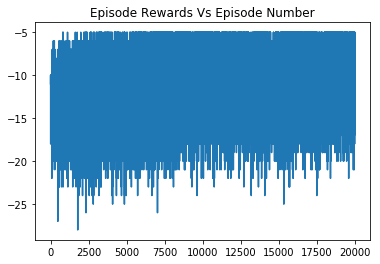

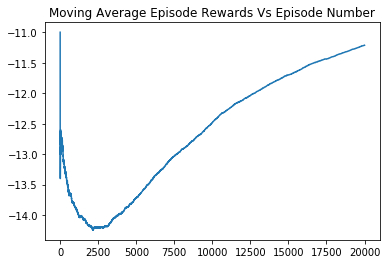

In [86]:
# Your solution goes here.
#SARSA Learning - Training
# get the required helper class and visualization function
from utils import env, drawTrajectory

# this makes sure that our description of the episode visualization makes sense
#np.random.seed(321)


#Initialize Q
Q = np.zeros(shape = (18,14,36,9)) #indices represent Q[y,x,velocity,action]
 

episodeRewards = [] #Store rewards of each episode
averageRewards = [0] #store avg reward obtained uptil that episode


for episode in range(noEpisodes):
    print(f'Episode No {episode}')
    
    # create a racing environment
    racer = env()
    # reset the agent to one of the 4 starting cells at random
    # do this before each new episode
    racer.reset()
    # you can also manually set the agent position if you want to examine its behaviour there
    #racer.setPosition(17,6)
    # create flag tracking whether the episode is over
    done = False

    # create lists to save the trajectory and the decisions of the agent
    actions = []
    moves = []
    velocities = []
    episodeReward = 0

    # these methods do what you would expect
    # v is an integer in [0, 35] representing a velocity
    # y, x are both integers, together, they represent the agents location
    v = racer.getVelocity()
    y, x = racer.getPosition()
    
    # which actions are possible at the current velocity?
    # the actions are integers in [0,8]
    
    possibleActions = racer.getAvailableActions()
    
    #Choose action in epsilon greedy manner
    a = epsilonGreedy(Q,y,x,v,possibleActions,epsilon)
    step = 0
    
    # simulate until the episode is over
    while not done:
        step+=1
        print(f'Step No {step}')
        # save the action
        actions.append(a)
        # execute the action using the step function
        # y, x, v are new positions and velocities
        # done is the flag whether the episode is over
        # travel details exactly which cells the agent traveled through
        y_prime, x_prime, v_prime, r, done, travel = racer.step(action = a)
        
        possibleActions = racer.getAvailableActions() 
        a_prime = epsilonGreedy(Q,y_prime,x_prime,v_prime,possibleActions,epsilon)
        
        Q[y,x,v,a] += alpha * (r + gamma*Q[y_prime,x_prime,v_prime,a_prime] - Q[y,x,v,a]) #SARSA update
        
        episodeReward += r
        
        y, x, v = y_prime, x_prime, v_prime
        a = a_prime
        
        # save the velocities
        velocities.append(v)
        # save the cells that the agent most recently passed through
        # they are only needed for visualization
        moves.append(travel)

    episodeRewards.append(episodeReward)
    #Moving avg formula is new_mean = old_mean(1-1/n) + new_value/n 
    #where n is new length 
    averageRewards.append(averageRewards[-1] + (episodeReward-averageRewards[-1])/(episode+1)) 

plt.title("Episode Rewards Vs Episode Number")
plt.plot(range(noEpisodes),episodeRewards)
plt.show()

plt.title("Moving Average Episode Rewards Vs Episode Number")
plt.plot(range(noEpisodes),averageRewards[1:])
plt.show()


X Start is 2


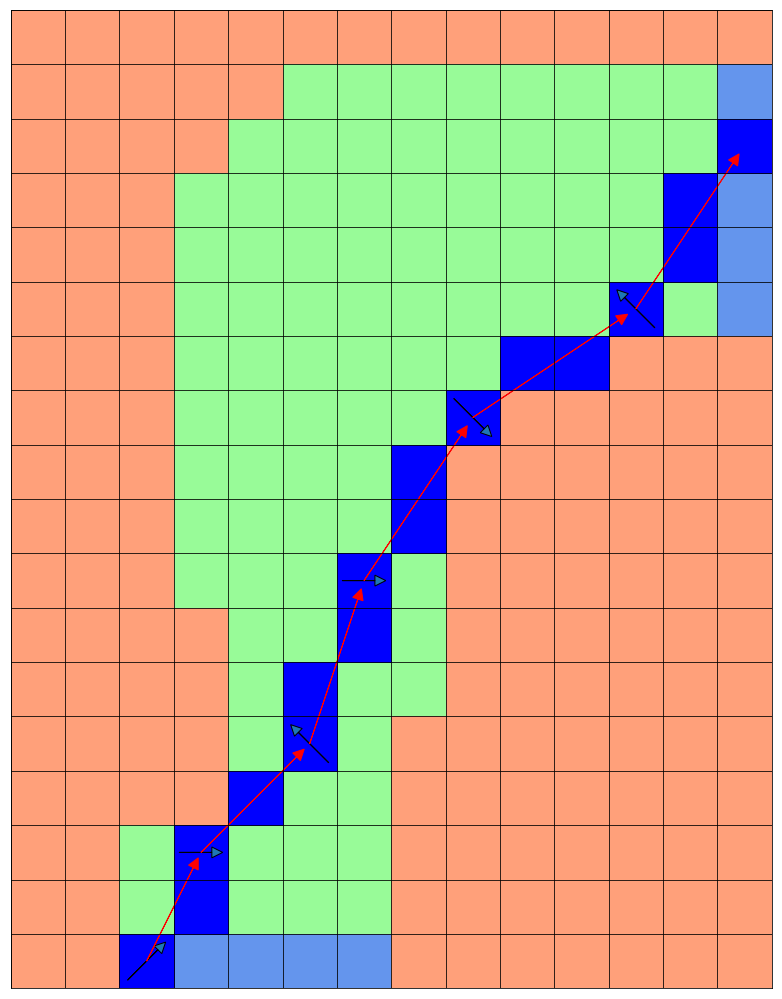

X Start is 3


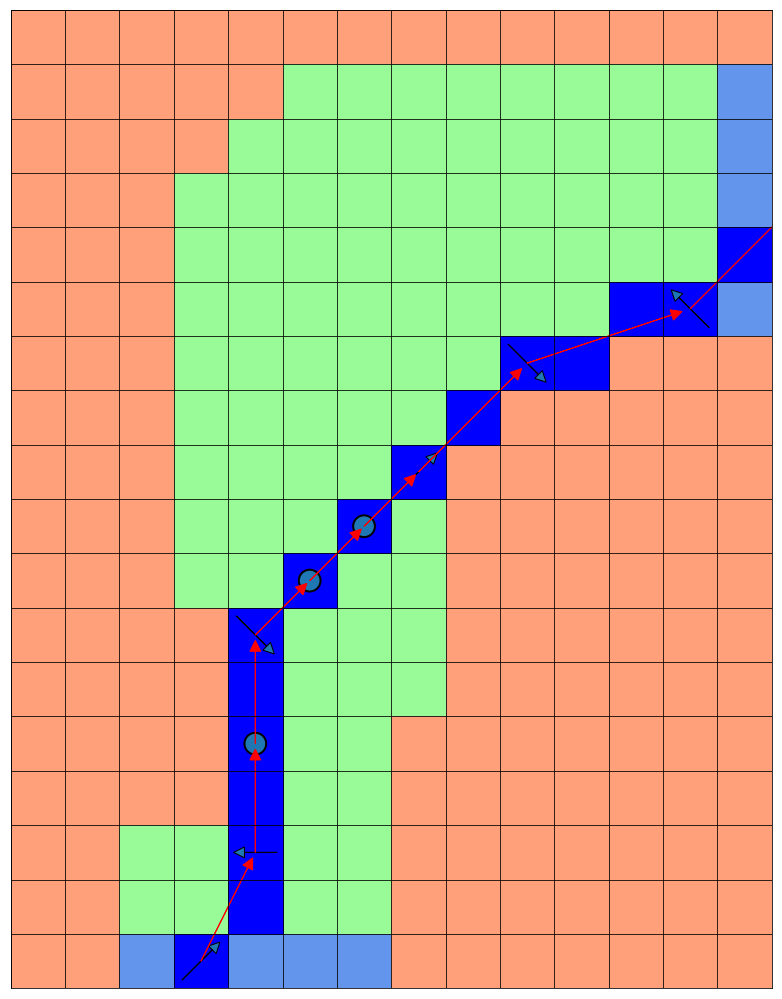

X Start is 4


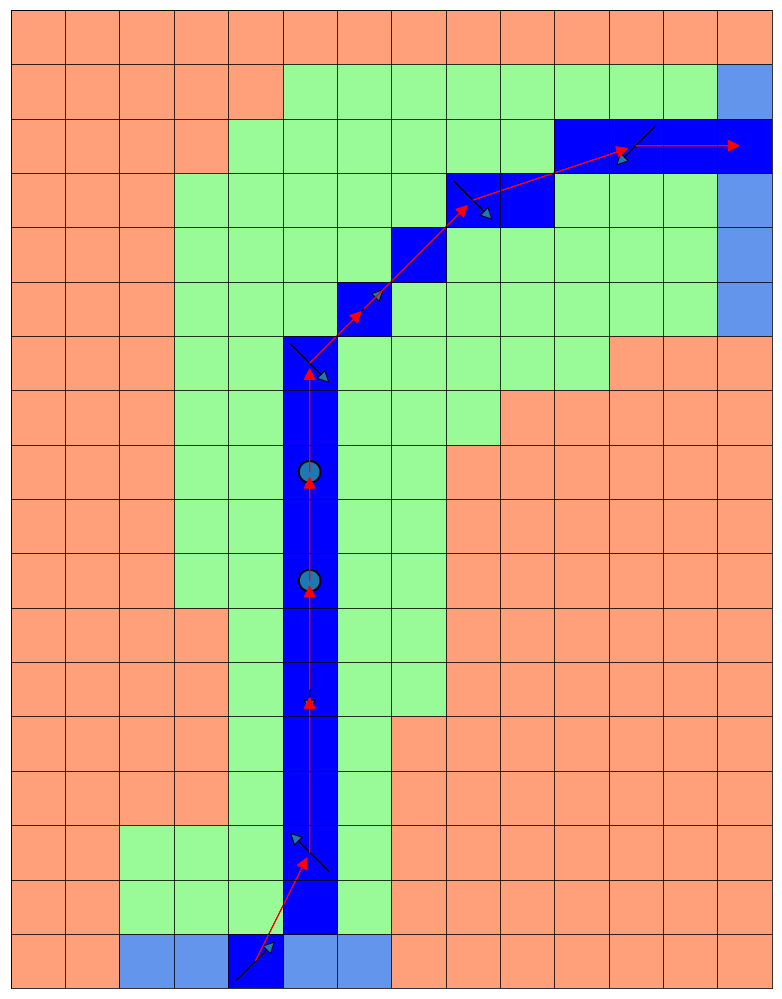

X Start is 5


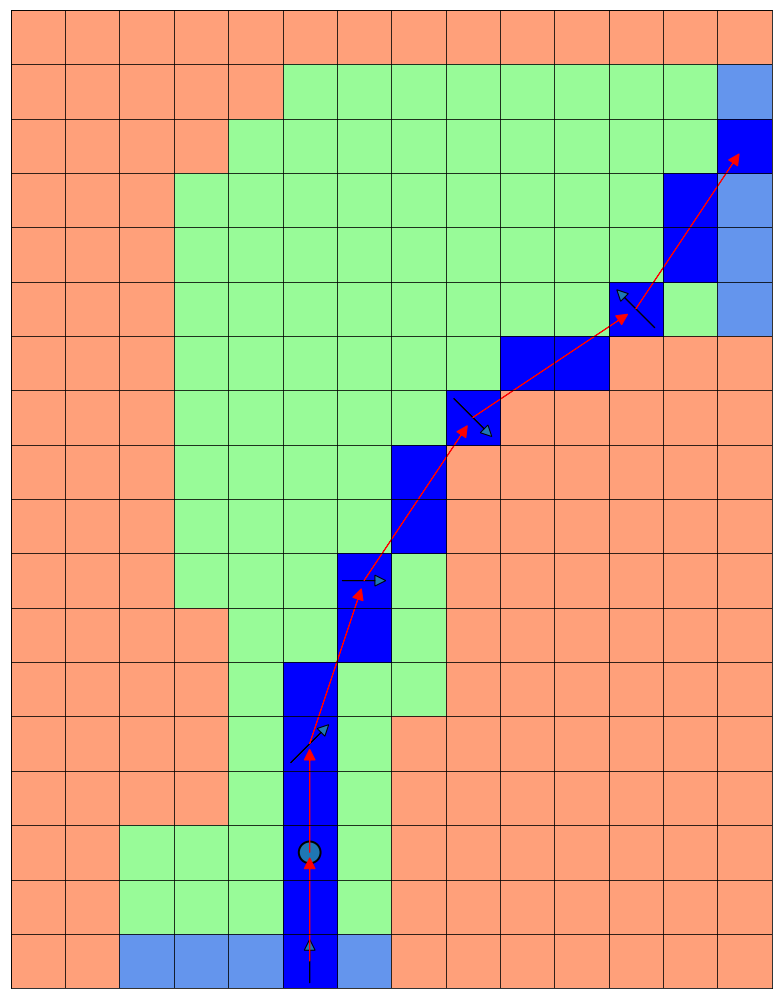

X Start is 6


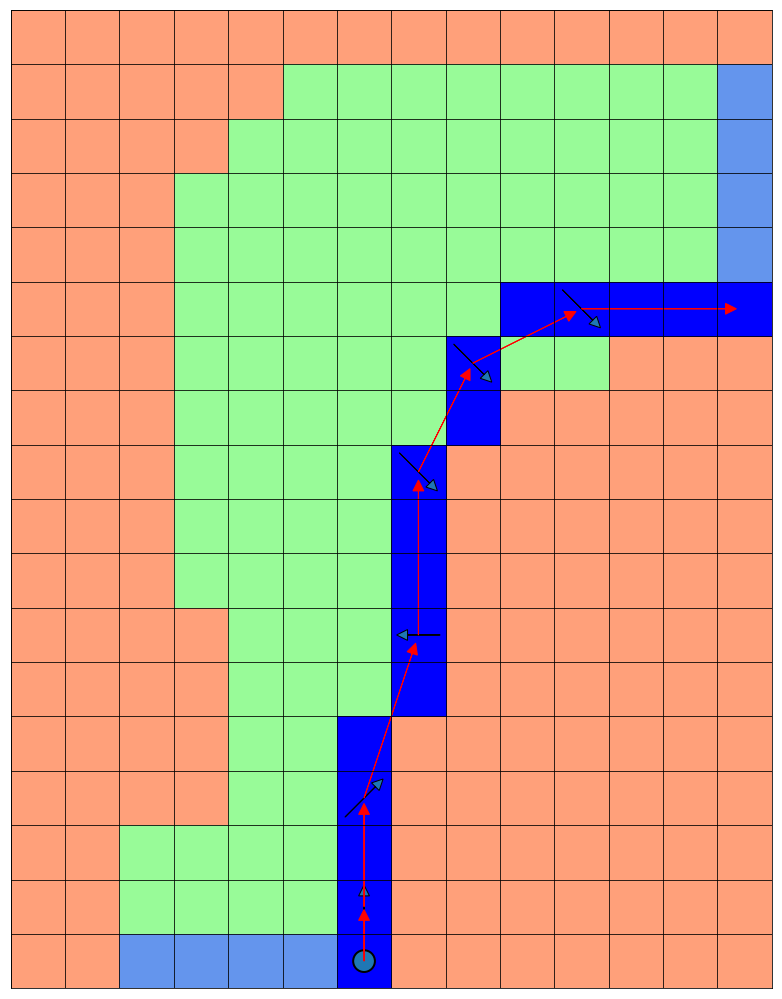

In [87]:
#Simulate episodes with diff starting by choosing policy that chooses the optimal Q value

for startXPosition in [2,3,4,5,6]:
    # create a racing environment
    racer = env()
    # reset the agent to one of the 4 starting cells at random
    # do this before each new episode
    racer.reset()
    # you can also manually set the agent position if you want to examine its behaviour there
    racer.setPosition(17,startXPosition)
    # create flag tracking whether the episode is over
    done = False

    # create lists to save the trajectory and the decisions of the agent
    actions = []
    moves = []
    velocities = []

    # these methods do what you would expect
    # v is an integer in [0, 35] representing a velocity
    # y, x are both integers, together, they represent the agents location
    v = racer.getVelocity()
    y, x = racer.getPosition()

    # simulate until the episode is over
    while not done:
        # which actions are possible at the current velocity?
        # the actions are integers in [0,8]
        possibleActions = racer.getAvailableActions()

        a = epsilonGreedy(Q,y,x,v,possibleActions,0) #Follow optimal action as given by Q values, epsilon = 0

        # save the action
        actions.append(a)
        # execute the action using the step function
        # y, x, v are new positions and velocities
        # done is the flag whether the episode is over
        # travel details exactly which cells the agent traveled through
        y, x, v, r, done, travel = racer.step(action = a)
        # save the velocities
        velocities.append(v)
        # save the cells that the agent most recently passed through
        # they are only needed for visualization
        moves.append(travel)

    # use the helper function to display how the episode went
    print(f'X Start is {startXPosition}')
    drawTrajectory(moves, actions, velocities)

### Task 22

Repeat the previous task, this time using Sarsa($\lambda$) to find the optimal policy $\pi^*(s,a)$. Again present your results as required above.

<div style="text-align: right; font-weight:bold"> 4 Points </div>

In [88]:
#Hyperparameters
#These were determined after some experimentation 
noEpisodes = 20000
gamma = 0.9 #represents how much future rewards matters wrt to current rewards
epsilon = 0.3 #exploration vs exploitation
alpha = 0.2 #Weightage for new rewards vs old rewards
Lambda = 0.8 #represents how much future rewards matters wrt to current rewards

Episode No 0
Step No 1
Step No 2
Episode No 1
Step No 1
Step No 2
Step No 3
Episode No 2
Step No 1
Step No 2
Step No 3
Episode No 3
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 6
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 7
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 8
Step No 1
Step No 2
Episode No 9
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 10
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 11
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 12
Step No 1
Step No 2
Step No 3
Episode No 13
Step No 1
Step No 2
Episode No 14
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15
Step No 1
Step No 2
Episode No 16
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
St

Step No 3
Step No 4
Episode No 174
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 175
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 176
Step No 1
Step No 2
Episode No 177
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 178
Step No 1
Step No 2
Step No 3
Episode No 179
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 180
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 181
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 182
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 183
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 184
Step No 1
Step No 2
Episode No 185
Step No 1
Step No 2
Step No 3
Episode No 186
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
S

Step No 4
Step No 5
Step No 6
Episode No 300
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 301
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 302
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 303
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 304
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 305
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 306
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 307
Step No 1
Step No 2
Episode No 308
Step No 1
Step No 2
Step No 3
Episode No 309
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 310
Step No 1
Step No 2
Step No 3
Episode No 311
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 312
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 313
Step N

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 459
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 460
Step No 1
Step No 2
Episode No 461
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 462
Step No 1
Step No 2
Episode No 463
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 464
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 465
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 466
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 467
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 468
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 469
Step No 1
Step No 2
Episode No 470
Step No 1
Step No 2
Step No 3
Episode No 471
Step No 1
Step No 2
S

Step No 7
Step No 8
Episode No 587
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 588
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 589
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 590
Step No 1
Step No 2
Episode No 591
Step No 1
Step No 2
Episode No 592
Step No 1
Episode No 593
Step No 1
Step No 2
Step No 3
Episode No 594
Step No 1
Step No 2
Episode No 595
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 596
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 597
Step No 1
Step No 2
Step No 3
Episode No 598
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 599
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 600
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 601
Step No 1
Step No 2
St

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 741
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 742
Step No 1
Step No 2
Episode No 743
Step No 1
Episode No 744
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 745
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 746
Step No 1
Step No 2
Step No 3
Episode No 747
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 748
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 749
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 750
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 751
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 752
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 753
Step No 1
Step No 2
Step No 3
Episode No 754
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5


Step No 2
Step No 3
Step No 4
Episode No 882
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 883
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 884
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 885
Step No 1
Step No 2
Step No 3
Episode No 886
Step No 1
Episode No 887
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 888
Step No 1
Step No 2
Step No 3
Episode No 889
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 890
Step No 1
Step No 2
Step No 3
Episode No 891
Step No 1
Step No 2
Episode No 892
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 893
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 894
Step No 1
Step No 2
Step No 3
Episode No 895
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 896
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Epi

Step No 11
Step No 12
Episode No 1015
Step No 1
Episode No 1016
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 1017
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 1018
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 1019
Step No 1
Episode No 1020
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 1021
Step No 1
Step No 2
Episode No 1022
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 1023
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1024
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 1025
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1026
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 1027
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 1028
Step No 1
S

Step No 1
Step No 2
Step No 3
Step No 4
Episode No 1159
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 1160
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1161
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 1162
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 1163
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 1164
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 1165
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 1166
Step No 1
Step No 2
Episode No 1167
Step No 1
Step No 2
Step No 3
Episode No 1168
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 1169
Step No 1
Episode No 1170
Step No 1
Step No 2
Episode No 1171
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step N

Step No 6
Step No 7
Step No 8
Episode No 1289
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 1290
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1291
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 1292
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 1293
Step No 1
Step No 2
Step No 3
Episode No 1294
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 1295
Step No 1
Episode No 1296
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 1297
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1298
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 1299
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1300
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 1301
Step No 1
Step No 2
Episode No 1302
Step No 1
Step N

Step No 12
Episode No 1426
Step No 1
Step No 2
Step No 3
Episode No 1427
Step No 1
Step No 2
Step No 3
Episode No 1428
Step No 1
Step No 2
Step No 3
Episode No 1429
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 1430
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 1431
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1432
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 1433
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 1434
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1435
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1436
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 1437
Step No 1
Episode No 1438
Step No 1
Step No 2
Step No 3
Step No 4
Step 

Step No 3
Step No 4
Episode No 1547
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1548
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 1549
Step No 1
Episode No 1550
Step No 1
Step No 2
Episode No 1551
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1552
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 1553
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 1554
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1555
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 1556
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1557
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step N

Step No 2
Episode No 1672
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1673
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 1674
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1675
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 1676
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 1677
Step No 1
Episode No 1678
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 1679
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1680
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1681
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 1682
Step No 1
Step No 2
Step No 3
Episode No 1683
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1684
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7

Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 1793
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 1794
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1795
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1796
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1797
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 1798
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1799
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1800
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1801
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 1802
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 1803
Step No 1


Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1925
Step No 1
Step No 2
Step No 3
Episode No 1926
Step No 1
Step No 2
Episode No 1927
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1928
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 1929
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1930
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1931
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 1932
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1933
Step No 1
Step No 2
Episode No 1934
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1935
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 1936
Step No 1
Step No 2
Episode No 1937
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Ep

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 2044
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2045
Step No 1
Step No 2
Step No 3
Episode No 2046
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 2047
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2048
Step No 1
Step No 2
Episode No 2049
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2050
Step No 1
Step No 2
Episode No 2051
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 2052
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2053
Step No 1
Step No 2
Step No 3
Episode No 2054
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 2055
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2056
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5


Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 2167
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2168
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2169
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2170
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 2171
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 2172
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2173
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 2174
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 2175
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 2176
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 21

Step No 6
Step No 7
Episode No 2286
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2287
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2288
Step No 1
Step No 2
Step No 3
Episode No 2289
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 2290
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 2291
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 2292
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2293
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2294
Step No 1
Step No 2
Step No 3
Episode No 2295
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 

Episode No 2395
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2396
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2397
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2398
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 2399
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2400
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 2401
Step No 1
Step No 2
Episode No 2402
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2403
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 2404
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5

Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2524
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2525
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 2526
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2527
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2528
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2529
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 2530
Step No 1
Step No 2
Episode No 2531
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2532
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2533
Step No 1
Step No 2
Step No 3
Episode No 2534
Step No 1
Step No 2
Step No 3
Episode No 2535
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2536
Step No 1
Step No 2
Step No 3
St

Episode No 2670
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2671
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 2672
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2673
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2674
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2675
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 2676
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2677
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 2678
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 2679
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 268

Step No 4
Step No 5
Step No 6
Episode No 2797
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2798
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 2799
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2800
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2801
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 2802
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 2803
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2804
Step No 1
Episode No 2805
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2806
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2807
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2808
Step

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2926
Step No 1
Step No 2
Step No 3
Episode No 2927
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2928
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 2929
Step No 1
Step No 2
Step No 3
Episode No 2930
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2931
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 2932
Step No 1
Step No 2
Step No 3
Episode No 2933
Step No 1
Step No 2
Step No 3
Episode No 2934
Step No 1
Episode No 2935
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 2936
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 2937
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 2938
Step No 1

Step No 8
Episode No 3039
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3040
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3041
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 3042
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3043
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3044
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 3045
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3046
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3047
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3048
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3049
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Ep

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 3158
Step No 1
Step No 2
Episode No 3159
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3160
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3161
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 3162
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3163
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3164
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 3165
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3166
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3167
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step N

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3268
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 3269
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3270
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 3271
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3272
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3273
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 3274
Step No 1
Step No 2
Step No 3
Episode No 3275
Step No 1
Step No 2
Episode No 3276
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3277
Step No 1
Step No 2
Step No 3
Episode No 3278
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 3279
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Epis

Step No 2
Step No 3
Step No 4
Episode No 3393
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3394
Step No 1
Step No 2
Episode No 3395
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3396
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 3397
Step No 1
Step No 2
Step No 3
Episode No 3398
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 3399
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3400
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3401
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 3402
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3403
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3404
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Ste

Step No 8
Step No 9
Episode No 3518
Step No 1
Step No 2
Episode No 3519
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3520
Step No 1
Step No 2
Episode No 3521
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3522
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3523
Step No 1
Step No 2
Episode No 3524
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3525
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 3526
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3527
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 3528
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3529
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3530
Step No 1
Step No 2
S

Step No 4
Step No 5
Step No 6
Episode No 3644
Step No 1
Step No 2
Step No 3
Episode No 3645
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3646
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3647
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3648
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 3649
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 3650
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3651
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 3652
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3653
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3654
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3655
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3656
Step No 1
Step No 2
Step No 3
Step No 4
St

Step No 10
Episode No 3751
Step No 1
Step No 2
Episode No 3752
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 3753
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3754
Step No 1
Step No 2
Step No 3
Episode No 3755
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3756
Step No 1
Step No 2
Step No 3
Episode No 3757
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3758
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3759
Step No 1
Episode No 3760
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3761
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 3762
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3763
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No

Step No 5
Step No 6
Step No 7
Episode No 3859
Step No 1
Episode No 3860
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3861
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3862
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3863
Step No 1
Step No 2
Step No 3
Episode No 3864
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 3865
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3866
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3867
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 3868
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 3869
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3870
Step No 1
Step No 2
Step No 3
Step No 4
Step No

Step No 6
Step No 7
Step No 8
Step No 9
Episode No 3967
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3968
Step No 1
Step No 2
Step No 3
Episode No 3969
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3970
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 3971
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3972
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3973
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3974
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3975
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 3976
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 3977
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 3978
Step No 1
Step No 2
Step No

Step No 7
Episode No 4082
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4083
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4084
Step No 1
Step No 2
Episode No 4085
Step No 1
Step No 2
Step No 3
Episode No 4086
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4087
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4088
Step No 1
Step No 2
Episode No 4089
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4090
Step No 1
Episode No 4091
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4092
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4093
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4094
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4

Step No 2
Step No 3
Step No 4
Step No 5
Episode No 4218
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4219
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4220
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4221
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4222
Step No 1
Step No 2
Step No 3
Episode No 4223
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4224
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4225
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4226
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4227
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4228
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Ste

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4347
Step No 1
Step No 2
Episode No 4348
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4349
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4350
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 4351
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4352
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4353
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4354
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4355
Step No 1
Step No 2
Episode No 4356
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4357
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4358
Step No 1
Step No 

Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 4473
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4474
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4475
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4476
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4477
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4478
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4479
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4480
Step No 1
Step No 2
Step No 3
Episode No 4481
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4482
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4483

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4600
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4601
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4602
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 4603
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4604
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4605
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4606
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4607
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4608
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4609
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 4610
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4611
Step N

Episode No 4722
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4723
Step No 1
Step No 2
Episode No 4724
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4725
Step No 1
Step No 2
Step No 3
Episode No 4726
Step No 1
Step No 2
Episode No 4727
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4728
Step No 1
Episode No 4729
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 4730
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4731
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 4732
Step No 1
Step No 2
Episode No 4733
Step No 1
Step No 2
Step No 3
Episode No 4734
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 4735
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4736
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 4737
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Ste

Episode No 4854
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4855
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4856
Step No 1
Step No 2
Step No 3
Episode No 4857
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4858
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4859
Step No 1
Step No 2
Episode No 4860
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 4861
Step No 1
Step No 2
Episode No 4862
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4863
Step No 1
Step No 2
Step No 3
Episode No 4864
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4865
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4866
Step No 1
Step No 2


Step No 10
Step No 11
Episode No 4967
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4968
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4969
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 4970
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 4971
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4972
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4973
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4974
Step No 1
Step No 2
Step No 3
Episode No 4975
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 4976
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 4977
Step No 1
Step No 2
Episode No 4978
Step No 1
Step No 2
Episode No 4979
Step No 1
Step No 2
Step No 3
Step No 4


Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5091
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5092
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5093
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5094
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 5095
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5096
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5097
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5098
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5099
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 5100
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 

Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 5207
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5208
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5209
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5210
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5211
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5212
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5213
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5214
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5215
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5216
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5217
Ste

Step No 11
Step No 12
Episode No 5308
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5309
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5310
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 5311
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5312
Step No 1
Step No 2
Step No 3
Episode No 5313
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5314
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5315
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5316
Step No 1
Step No 2
Episode No 5317
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5318
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5319
Step No 1
Step No 2
Step No 3
Ste

Step No 6
Episode No 5436
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5437
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5438
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5439
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 5440
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5441
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5442
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5443
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5444
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5445
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5446
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5447
Step No 

Step No 3
Step No 4
Episode No 5558
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 5559
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 5560
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5561
Step No 1
Episode No 5562
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 5563
Step No 1
Episode No 5564
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5565
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5566
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5567
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5568
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5569
St

Step No 12
Step No 13
Step No 14
Step No 15
Episode No 5667
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5668
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5669
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5670
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5671
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5672
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 5673
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5674
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 5675
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 5676
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5677
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 5678
Ste

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5792
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5793
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 5794
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5795
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 5796
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 5797
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5798
Step No 1
Step No 2
Episode No 5799
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5800
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 5801
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5802
S

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5909
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 5910
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 5911
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5912
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 5913
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5914
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 5915
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 5916
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 5917
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Ep

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6021
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6022
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 6023
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6024
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6025
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 6026
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 6027
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 6028
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 6029
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6030
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 

Step No 8
Step No 9
Step No 10
Episode No 6144
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6145
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6146
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6147
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6148
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6149
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6150
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6151
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6152
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6153
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6154
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Epi

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 6268
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 6269
Step No 1
Step No 2
Episode No 6270
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6271
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6272
Step No 1
Episode No 6273
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6274
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6275
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6276
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 6277
Step No 1
Episode No 6278
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 6279
Step No 1
Step No 2
Step No 3
Ste

Step No 6
Step No 7
Episode No 6393
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 6394
Step No 1
Step No 2
Step No 3
Episode No 6395
Step No 1
Step No 2
Step No 3
Episode No 6396
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6397
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6398
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 6399
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6400
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6401
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 6402
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6403
Step No 1
Step No 2

Step No 1
Step No 2
Step No 3
Episode No 6513
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6514
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6515
Step No 1
Step No 2
Episode No 6516
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6517
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6518
Step No 1
Step No 2
Episode No 6519
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6520
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6521
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6522
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6523
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
E

Episode No 6623
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6624
Step No 1
Episode No 6625
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 6626
Step No 1
Step No 2
Step No 3
Episode No 6627
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 6628
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6629
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6630
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6631
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6632
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6633
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6634
Step No 1
Step No 2
Episode No 6635
Step No 1
Step No 2
Step No 3
Step No 4
Step No 

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6744
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 6745
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6746
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6747
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 6748
Step No 1
Episode No 6749
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 6750
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6751
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6752
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6753
Step No 1
Step No 2
Episode No 6754
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6755
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6756
Step No 1


Step No 3
Episode No 6857
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6858
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6859
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 6860
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6861
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 6862
Step No 1
Episode No 6863
Step No 1
Step No 2
Episode No 6864
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6865
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6866
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6867
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6868
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 6869
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6870
Step No 1
Step N

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6971
Step No 1
Step No 2
Step No 3
Episode No 6972
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6973
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6974
Step No 1
Step No 2
Episode No 6975
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 6976
Step No 1
Step No 2
Episode No 6977
Step No 1
Step No 2
Step No 3
Episode No 6978
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 6979
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 6980
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 6981
Step No 1
Step No 2
Step No 3
Episode No 6982
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 6983
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 6984
Step 

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7100
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 7101
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7102
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7103
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7104
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7105
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7106
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7107
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7108
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7109
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episod

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7234
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7235
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 7236
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7237
Step No 1
Step No 2
Step No 3
Episode No 7238
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 7239
Step No 1
Step No 2
Episode No 7240
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7241
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7242
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7243
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7244
Step No 1
Step No 2
Step No 3

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 7346
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7347
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7348
Step No 1
Step No 2
Episode No 7349
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 7350
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7351
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 7352
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 7353
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7354
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7355
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7356
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7357
Step No 1
Step

Step No 6
Step No 7
Step No 8
Episode No 7471
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 7472
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7473
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7474
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7475
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7476
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7477
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 7478
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7479
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7480
Step No 1
Step No 2
Episode No 7481
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 7482
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No

Step No 6
Step No 7
Episode No 7589
Step No 1
Step No 2
Step No 3
Episode No 7590
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7591
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7592
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7593
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7594
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7595
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7596
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7597
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7598
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7599
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 7600
Step 

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7715
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 7716
Step No 1
Episode No 7717
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7718
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7719
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 7720
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 7721
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7722
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7723
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode 

Step No 6
Step No 7
Episode No 7839
Step No 1
Episode No 7840
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 7841
Step No 1
Step No 2
Episode No 7842
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7843
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 7844
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7845
Step No 1
Episode No 7846
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 7847
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 7848
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7849
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7850
Step No 1
Step No 2
Episode No 7851
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 7852


Step No 6
Step No 7
Episode No 7959
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7960
Step No 1
Step No 2
Step No 3
Episode No 7961
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7962
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 7963
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7964
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 7965
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 7966
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 7967
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 7968
Step No 1
Step No 2
Step No 3
Step No 4
St

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8072
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8073
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8074
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 8075
Step No 1
Step No 2
Step No 3
Episode No 8076
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8077
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8078
Step No 1
Step No 2
Episode No 8079
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8080
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 8081
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8082
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode N

Episode No 8184
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8185
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8186
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 8187
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8188
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8189
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 8190
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8191
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 8192
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 8193
Step No 1
Step No 2
St

Step No 7
Step No 8
Step No 9
Episode No 8292
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 8293
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8294
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 8295
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8296
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 8297
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 8298
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8299
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 8300
Ste

Episode No 8396
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8397
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8398
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8399
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8400
Step No 1
Step No 2
Episode No 8401
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8402
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8403
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8404
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8405
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8406
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 8407
Step No 1
Step No 2
Episode No 8408
Step No 1
Step No 2
Episode No 8409
Step N

Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 8501
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8502
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 8503
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8504
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8505
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 8506
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8507
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 8508
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 8509
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8510
Step No 1
Step No 2
Step No 3
Step No 4
Step No

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8622
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8623
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 8624
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8625
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 8626
Step No 1
Step No 2
Step No 3
Episode No 8627
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8628
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 8629
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8630
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 8631
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode 

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8736
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8737
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 8738
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 8739
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8740
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8741
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 8742
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 8743
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8744
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8745
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8746
St

Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8842
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 8843
Step No 1
Episode No 8844
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8845
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 8846
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8847
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 8848
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8849
Step No 1
Step No 2
Episode No 8850
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 8851
Step No 1
Step No 2
Episode No 8852
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8853
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8854
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Ep

Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8990
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8991
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 8992
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 8993
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8994
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 8995
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 8996
Step No 1
Episode No 8997
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8998
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 8999
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9000
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9001
Step No 1
Step No 2
Step No 3
Episode

Step No 5
Step No 6
Step No 7
Episode No 9118
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9119
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9120
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9121
Step No 1
Step No 2
Episode No 9122
Step No 1
Step No 2
Episode No 9123
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9124
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9125
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 9126
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9127
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9128
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9129
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 

Step No 9
Step No 10
Episode No 9237
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9238
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9239
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9240
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9241
Step No 1
Step No 2
Step No 3
Episode No 9242
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9243
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9244
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9245
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 9246
Step No 1
Step No 2
Episode No 9247
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9248
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode

Step No 5
Step No 6
Episode No 9354
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9355
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9356
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9357
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9358
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9359
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9360
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9361
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 9362
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9363
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9364
Step No 1
Step No 2
Step No 3
Step No 4
St

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 9460
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9461
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9462
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9463
Step No 1
Step No 2
Episode No 9464
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 9465
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9466
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 9467
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 9468
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9469
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step N

Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 9578
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9579
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9580
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9581
Step No 1
Step No 2
Episode No 9582
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9583
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9584
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9585
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9586
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 9587
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9588
Step No 1
Step No 2
St

Step No 7
Episode No 9689
Step No 1
Step No 2
Episode No 9690
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 9691
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9692
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 9693
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9694
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9695
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9696
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9697
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9698
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9699
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 9700
Step No 1
Step No 2
Step No 3
Step N

Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9802
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9803
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 9804
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9805
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9806
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9807
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9808
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9809
Step No 1
Step No 2
Episode No 9810
Step No 1
Episode No 9811
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 9812
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
S

Episode No 9907
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9908
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9909
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9910
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9911
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9912
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 9913
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9914
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9915
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 9916
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 9917
Step No 1
Step No 2
Step No 3
Step

Step No 5
Step No 6
Step No 7
Episode No 10005
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 10006
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 10007
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10008
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10009
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10010
Step No 1
Step No 2
Episode No 10011
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 10012
Step No 1
Episode No 10013
Step No 1
Episode No 10014
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10015
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 10016
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10017
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10018
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 10019
Step No 1
Step No 2
Step 

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10128
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10129
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 10130
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 10131
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10132
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 10133
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10134
Step No 1
Step No 2
Episode No 10135
Step No 1
Step No 2
Step No 3
Episode No 10136
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10137
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10138
Step No 1
Step No 2

Step No 7
Step No 8
Step No 9
Step No 10
Episode No 10254
Step No 1
Step No 2
Episode No 10255
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 10256
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10257
Step No 1
Step No 2
Episode No 10258
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10259
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 10260
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10261
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10262
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10263
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10264
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10265
St

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10373
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 10374
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10375
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10376
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 10377
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10378
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10379
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10380
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10381
Step No 1
Step No 2
Episode No 10382
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10383
Step No 1
Step No 2
Step No 3
Step No 4
S

Step No 7
Episode No 10490
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10491
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10492
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10493
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 10494
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10495
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10496
Step No 1
Step No 2
Episode No 10497
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10498
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 10499
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10500
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10501
Step No 1
Episode No 10502
Step No 1
Step No 2
Step No 3
Step No 

Step No 5
Step No 6
Episode No 10609
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10610
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 10611
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10612
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10613
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10614
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10615
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10616
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10617
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10618
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10619
Step No 1
Step No 2
Step No 3
Step No 4

Step No 6
Step No 7
Episode No 10728
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10729
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 10730
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10731
Step No 1
Step No 2
Step No 3
Episode No 10732
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10733
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10734
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 10735
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10736
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10737
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10738
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10739
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episod

Step No 10
Episode No 10853
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10854
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10855
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 10856
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 10857
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10858
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10859
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10860
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 10861
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10862
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 10863
Step No 1
Episode No 10864
Step No 1
Ste

Episode No 10969
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10970
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 10971
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 10972
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10973
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10974
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 10975
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 10976
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 10977
Step No 1
Step No 2
Episode No 10978
Step No 1
Episode No 10979
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 10980
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step

Step No 2
Episode No 11096
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11097
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11098
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11099
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11100
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11101
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11102
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 11103
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11104
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11105
Step No 1
Step No 2
Episode No 11106
Step No 1
Step No 2
Step No 3
Episode No 11107
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Epis

Step No 7
Step No 8
Step No 9
Episode No 11213
Step No 1
Episode No 11214
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11215
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 11216
Step No 1
Step No 2
Episode No 11217
Step No 1
Episode No 11218
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11219
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 11220
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11221
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11222
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 11223
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11224
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11334
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11335
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 11336
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11337
Step No 1
Episode No 11338
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11339
Step No 1
Step No 2
Episode No 11340
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 11341
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 11342
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11343
Step No 1
Step No 2
Episode No 11344
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11345
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11346
Step No 

Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11452
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11453
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11454
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11455
Step No 1
Step No 2
Episode No 11456
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11457
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11458
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11459
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 11460
Step No 1
Step No 2
Episode No 11461
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 11462
Step No 1
Step No 2
Step No 3
Episode No 11463
Step No 1
Step No 2
Episode No 11464
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6

Step No 3
Step No 4
Episode No 11606
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11607
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11608
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 11609
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11610
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 11611
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11612
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11613
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11614
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11615
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 11616
Step No 1
Step No 2
Step No 3
S

Step No 10
Step No 11
Episode No 11723
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 11724
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11725
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11726
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11727
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11728
Step No 1
Episode No 11729
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 11730
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11731
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11732
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11733
Step No 1
Step No 2
Step No 3
Episode No 11734
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11735
Step No 1
Step No 2
Step No

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11854
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 11855
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11856
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11857
Step No 1
Step No 2
Step No 3
Episode No 11858
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11859
Step No 1
Step No 2
Step No 3
Episode No 11860
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11861
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 11862
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11863
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11864
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode 

Step No 5
Episode No 11975
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11976
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11977
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11978
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 11979
Step No 1
Episode No 11980
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11981
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 11982
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 11983
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 11984
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 11985
Step No 1
Step No 2
Step No 3
Episode No 11986
Step No 1
Step No 2
St

Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12101
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12102
Step No 1
Step No 2
Episode No 12103
Step No 1
Step No 2
Episode No 12104
Step No 1
Step No 2
Step No 3
Episode No 12105
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12106
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12107
Step No 1
Step No 2
Episode No 12108
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12109
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12110
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12111
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12112
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
St

Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12210
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12211
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12212
Step No 1
Step No 2
Step No 3
Episode No 12213
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12214
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12215
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 12216
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 12217
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12218
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12219
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12220


Step No 6
Step No 7
Step No 8
Episode No 12337
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12338
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12339
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12340
Step No 1
Step No 2
Episode No 12341
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12342
Step No 1
Step No 2
Episode No 12343
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12344
Step No 1
Episode No 12345
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 12346
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12347
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12348
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12349
Step No 1
Step No 

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12454
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 12455
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12456
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12457
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12458
Step No 1
Step No 2
Step No 3
Episode No 12459
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12460
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12461
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12462
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 12463
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12464
S

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12578
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12579
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12580
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12581
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12582
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12583
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12584
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12585
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 12586
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 1258

Step No 7
Step No 8
Step No 9
Episode No 12704
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 12705
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12706
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12707
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 12708
Step No 1
Episode No 12709
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12710
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12711
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12712
Step No 1
Episode No 12713
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12714
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12715
Step No 1
Step No 2
Step No 3
Step No 4
Step

Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12823
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 12824
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 12825
Step No 1
Episode No 12826
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12827
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 12828
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 12829
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 12830
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12831
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 12832
Step No 1
Step No 2
St

Step No 6
Episode No 12955
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 12956
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 12957
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12958
Step No 1
Step No 2
Episode No 12959
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12960
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 12961
Step No 1
Step No 2
Episode No 12962
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 12963
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 12964
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 12965
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 12966
Step No 1
Step No 2
Step

Episode No 13061
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 13062
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 13063
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13064
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13065
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13066
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13067
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 13068
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13069
Step No 1
Step No 2
Episode No 13070
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13071
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13072
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step N

Step No 1
Step No 2
Step No 3
Episode No 13164
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 13165
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13166
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13167
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 13168
Step No 1
Step No 2
Step No 3
Episode No 13169
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13170
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13171
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13172
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13173
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 13174
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 13175
Step No 1
Step No 2
Step No 3
Step No 4
Step

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13277
Step No 1
Step No 2
Episode No 13278
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13279
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13280
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13281
Step No 1
Step No 2
Episode No 13282
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 13283
Step No 1
Step No 2
Episode No 13284
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13285
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 13286
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13287
Step No 1
Step No 2
Step No 3
Episode No 13288
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13289
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episod

Step No 2
Step No 3
Episode No 13398
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13399
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13400
Step No 1
Step No 2
Step No 3
Episode No 13401
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13402
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13403
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13404
Step No 1
Step No 2
Episode No 13405
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13406
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13407
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 13408
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 13409
Step No 1
Step No 2
Step No 3
Step

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13518
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13519
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13520
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13521
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 13522
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 13523
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13524
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 13525
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13526
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13527
Step No 1
Step No 2
Step No 3
Step No

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13631
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13632
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 13633
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13634
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13635
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 13636
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13637
Step No 1
Step No 2
Episode No 13638
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13639
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13640
Step No 1
Step No 2
Episode No 13641
Step No

Step No 8
Step No 9
Episode No 13742
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 13743
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13744
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13745
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13746
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13747
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 13748
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13749
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13750
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13751
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13752
Step No 1
Step No 2
Step No 3
St

Step No 8
Episode No 13892
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 13893
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13894
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 13895
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 13896
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 13897
Step No 1
Step No 2
Episode No 13898
Step No 1
Episode No 13899
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 13900
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 13901
Step No 1
Step No 2
Episode No 13902
Step No 1
Episode No 13903
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 13904
Step No 1
Step

Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14031
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14032
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14033
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14034
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14035
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14036
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14037
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 14038
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14039
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14040
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode N

Step No 4
Episode No 14141
Step No 1
Step No 2
Step No 3
Episode No 14142
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14143
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14144
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14145
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14146
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14147
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14148
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 14149
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14150
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14151
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
St

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14250
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14251
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14252
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14253
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14254
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14255
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14256
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14257
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14258
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14259
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7


Step No 5
Step No 6
Episode No 14374
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14375
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14376
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14377
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 14378
Step No 1
Step No 2
Step No 3
Episode No 14379
Step No 1
Step No 2
Step No 3
Episode No 14380
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14381
Step No 1
Episode No 14382
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 14383
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14384
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 14385
Step No 1
Step No 2
Episode No 14386
Step No 1
Step No 2
Episode No 14387
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
S

Step No 4
Step No 5
Step No 6
Episode No 14497
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 14498
Step No 1
Step No 2
Episode No 14499
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14500
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14501
Step No 1
Step No 2
Episode No 14502
Step No 1
Step No 2
Episode No 14503
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14504
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14505
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14506
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14507
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14508
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14509
Step No 1
Step No 2

Step No 7
Episode No 14604
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14605
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14606
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14607
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14608
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14609
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 14610
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14611
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14612
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14613
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 14614
Step No 1
Episode No 14615
Step No 1
Step No 2
Step

Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14710
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14711
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14712
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14713
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14714
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14715
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14716
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14717
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14718
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14719
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9


Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14819
Step No 1
Step No 2
Episode No 14820
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14821
Step No 1
Step No 2
Episode No 14822
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14823
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 14824
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14825
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14826
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14827
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14828
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14829
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14830
Step No 1
Step No 2
Step No 3
Step N

Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 14939
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14940
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 14941
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14942
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 14943
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14944
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 14945
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 14946
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 14947
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 14948
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step N

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15051
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15052
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15053
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15054
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 15055
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15056
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 15057
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15058
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15059
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15060
Step No 1
Step No 2
Step N

Step No 4
Step No 5
Step No 6
Episode No 15169
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15170
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 15171
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15172
Step No 1
Step No 2
Episode No 15173
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15174
Step No 1
Step No 2
Episode No 15175
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15176
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15177
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 15178
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15179
Step No 1
Step No 2
Step No 3
Episode No 15180
Step No 1


Episode No 15294
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15295
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15296
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15297
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 15298
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15299
Step No 1
Step No 2
Step No 3
Episode No 15300
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15301
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15302
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15303
Step No 1
Episode No 15304
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 15305
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15306
Step N

Step No 1
Step No 2
Step No 3
Step No 4
Episode No 15405
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15406
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15407
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15408
Step No 1
Step No 2
Episode No 15409
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15410
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15411
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 15412
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 15413
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15414
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15415
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 15416
Step No 1
Step No 2
Step 

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15531
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15532
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15533
Step No 1
Episode No 15534
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15535
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 15536
Step No 1
Step No 2
Episode No 15537
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15538
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15539
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15540
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 15541
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode N

Step No 7
Step No 8
Episode No 15653
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 15654
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15655
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 15656
Step No 1
Step No 2
Episode No 15657
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 15658
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 15659
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15660
Step No 1
Episode No 15661
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15662
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15663
Step No 1
Step No 2
Episode No 15664
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15665
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 15770
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 15771
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15772
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 15773
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15774
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 15775
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15776
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 15777
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15778
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step

Step No 7
Step No 8
Step No 9
Step No 10
Episode No 15885
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 15886
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15887
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 15888
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15889
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15890
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15891
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15892
Step No 1
Step No 2
Step No 3
Episode No 15893
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 15894
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 15895
Step No 1
Step No 2
S

Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16002
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16003
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16004
Step No 1
Step No 2
Episode No 16005
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16006
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16007
Step No 1
Episode No 16008
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16009
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16010
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16011
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16012
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
S

Step No 2
Step No 3
Step No 4
Episode No 16120
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16121
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 16122
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16123
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 16124
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 16125
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16126
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16127
Step No 1
Step No 2
Step No 3
Episode No 16128
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 16129
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episod

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16267
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16268
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16269
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16270
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16271
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16272
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16273
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 16274
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16275
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 16276
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 1

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16383
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16384
Step No 1
Step No 2
Episode No 16385
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16386
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16387
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16388
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16389
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16390
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16391
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16392
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16393
Step No 1
Episode No 16394
Step No 1
Step No 2
Step No 3
Episode No 16395
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5

Episode No 16502
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16503
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16504
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16505
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16506
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16507
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16508
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16509
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 16510
Step No 1
Step No 2
Episode No 16511
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16512
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 16513
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step 

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16630
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 16631
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16632
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16633
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16634
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 16635
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16636
Step No 1
Step No 2
Step No 3
Episode No 16637
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16638
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16639
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 16640
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16641
Step No 1
Step No 2
Step 

Step No 4
Episode No 16753
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16754
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16755
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16756
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16757
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16758
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16759
Step No 1
Step No 2
Step No 3
Episode No 16760
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16761
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 16762
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16763
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16764
Step No 1
Step No 2
Step No 3
Step 

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16883
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16884
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 16885
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16886
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16887
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16888
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16889
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16890
Step No 1
Step No 2
Step No 3
Episode No 16891
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 16892
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16893
Step No 1
Step No 2
Ep

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 16996
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 16997
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16998
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 16999
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17000
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17001
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17002
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17003
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17004
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 17005
Step No 1
Step No 2
Episode No 17006
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Ste

Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17110
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17111
Step No 1
Step No 2
Episode No 17112
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17113
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17114
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17115
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17116
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 17117
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 17118
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17119
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17120
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
E

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 17237
Step No 1
Step No 2
Episode No 17238
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 17239
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17240
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17241
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 17242
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 17243
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17244
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 17245
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode N

Step No 7
Step No 8
Step No 9
Episode No 17361
Step No 1
Step No 2
Episode No 17362
Step No 1
Step No 2
Episode No 17363
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17364
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17365
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17366
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17367
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17368
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 17369
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17370
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17371
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17372
Step No 1
Step No 2
Episode No 17373
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5

Step No 5
Step No 6
Step No 7
Episode No 17482
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17483
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17484
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 17485
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17486
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 17487
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17488
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17489
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17490
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 17491
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17492
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
S

Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17598
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17599
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17600
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17601
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17602
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17603
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 17604
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 17605
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17606
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17607
Step No 1
Step No 2
Step No 3
Step No

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17714
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17715
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17716
Step No 1
Step No 2
Step No 3
Episode No 17717
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17718
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17719
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17720
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17721
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17722
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17723
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 17724
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17725
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episod

Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17816
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17817
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17818
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17819
Step No 1
Step No 2
Episode No 17820
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17821
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 17822
Step No 1
Episode No 17823
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 17824
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17825
Step No 1
Episode No 17826
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 17827
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
St

Step No 7
Step No 8
Episode No 17924
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17925
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17926
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 17927
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 17928
Step No 1
Step No 2
Step No 3
Episode No 17929
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 17930
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 17931
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17932
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 17933
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17934
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 17935
Step No 1
Step No 2
Step

Step No 7
Episode No 18028
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18029
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 18030
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 18031
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18032
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18033
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18034
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18035
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18036
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 18037
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step 

Episode No 18148
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18149
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 18150
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18151
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 18152
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18153
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18154
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18155
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 18156
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18157
Step No 1
Step No 2
Step No 3
Step No

Step No 5
Step No 6
Step No 7
Episode No 18265
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 18266
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 18267
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Episode No 18268
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18269
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18270
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18271
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 18272
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18273
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6

Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 18382
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 18383
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18384
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18385
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18386
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18387
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18388
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18389
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18390
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18391
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 

Step No 7
Step No 8
Step No 9
Step No 10
Episode No 18493
Step No 1
Step No 2
Episode No 18494
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18495
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18496
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18497
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18498
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18499
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18500
Step No 1
Step No 2
Episode No 18501
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18502
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18503
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18504
Step No 1
Step No 2
Step 

Step No 6
Episode No 18604
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18605
Step No 1
Step No 2
Episode No 18606
Step No 1
Episode No 18607
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18608
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18609
Step No 1
Step No 2
Step No 3
Episode No 18610
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18611
Step No 1
Step No 2
Step No 3
Episode No 18612
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18613
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18614
Step No 1
Step No 2
Step No 3
Episode No 18615
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18616
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 18617
Step No 1
E

Step No 3
Episode No 18726
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18727
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 18728
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 18729
Step No 1
Step No 2
Episode No 18730
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18731
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18732
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18733
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18734
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18735
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 187

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18832
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18833
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 18834
Step No 1
Step No 2
Episode No 18835
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18836
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 18837
Step No 1
Step No 2
Episode No 18838
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 18839
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 18840
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18841
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 18842
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18843
Step No 1
Step

Step No 7
Episode No 18938
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 18939
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Episode No 18940
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18941
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18942
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 18943
Step No 1
Step No 2
Episode No 18944
Step No 1
Step No 2
Step No 3
Episode No 18945
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 18946
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 18947
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 18948
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode

Step No 8
Step No 9
Episode No 19055
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19056
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Step No 12
Step No 13
Step No 14
Episode No 19057
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19058
Step No 1
Step No 2
Episode No 19059
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19060
Step No 1
Step No 2
Episode No 19061
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19062
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19063
Step No 1
Step No 2
Step No 3
Episode No 19064
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19065
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 19066
Step No 1
Step No 2
Step No 3
Step No 4
S

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19172
Step No 1
Step No 2
Step No 3
Episode No 19173
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 19174
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19175
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 19176
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19177
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19178
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19179
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19180
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19181
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19182
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Ste

Episode No 19278
Step No 1
Episode No 19279
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19280
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19281
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19282
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19283
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19284
Step No 1
Step No 2
Episode No 19285
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19286
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19287
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 19288
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19289
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step N

Step No 5
Step No 6
Step No 7
Episode No 19387
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19388
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19389
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19390
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19391
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19392
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19393
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19394
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19395
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19396
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19397
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Ste

Step No 8
Step No 9
Step No 10
Episode No 19497
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19498
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 19499
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 19500
Step No 1
Step No 2
Episode No 19501
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 19502
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19503
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 19504
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19505
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19506
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19507
Step No 1
Step No 

Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode No 19602
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19603
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19604
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19605
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19606
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19607
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19608
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19609
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Episode No 19610
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 19611
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Episode 

Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19716
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19717
Step No 1
Step No 2
Episode No 19718
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Step No 9
Step No 10
Step No 11
Episode No 19719
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19720
Step No 1
Step No 2
Episode No 19721
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19722
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19723
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Episode No 19724
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19725
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19726
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19727
Step

Step No 6
Step No 7
Step No 8
Episode No 19834
Step No 1
Step No 2
Episode No 19835
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19836
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19837
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19838
Step No 1
Step No 2
Episode No 19839
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19840
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19841
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19842
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19843
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19844
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19845
Step No 1
Episode No 19846
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19847
Step No 1
Step No 2
St

Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19957
Step No 1
Step No 2
Step No 3
Step No 4
Episode No 19958
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19959
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19960
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19961
Step No 1
Step No 2
Episode No 19962
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Step No 8
Episode No 19963
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19964
Step No 1
Episode No 19965
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19966
Step No 1
Episode No 19967
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Episode No 19968
Step No 1
Step No 2
Step No 3
Step No 4
Step No 5
Step No 6
Step No 7
Episode No 19969
Step No 1
Step No 2
Episode No 19970
Step No 1
Step No 2
Step No 3
Step No 4
St

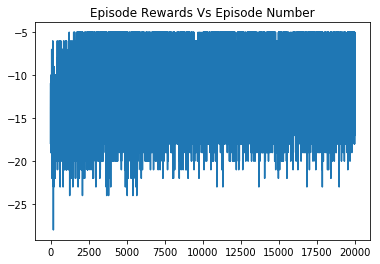

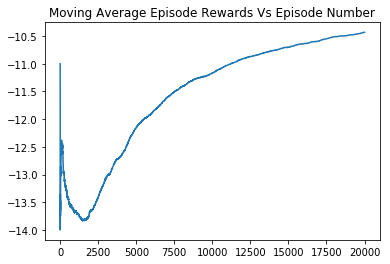

In [89]:
# Your solution goes here.

# Your solution goes here.
#SARSA(\lambda) Learning - Training

# get the required helper class and visualization function
from utils import env, drawTrajectory

#Initialize Q
Q = np.zeros(shape = (18,14,36,9)) #indices represent Q[y,x,velocity,action]
 

episodeRewards = [] #Store rewards of each episode
averageRewards = [0] #store avg reward obtained uptil that episode


for episode in range(noEpisodes):
    print(f'Episode No {episode}')
    

    
    # create a racing environment
    racer = env()
    # reset the agent to one of the 4 starting cells at random
    # do this before each new episode
    racer.reset()
    # you can also manually set the agent position if you want to examine its behaviour there
    #racer.setPosition(17,6)
    # create flag tracking whether the episode is over
    done = False

    # create lists to save the trajectory and the decisions of the agent
    actions = []
    moves = []
    velocities = []
    episodeReward = 0
    step = 0

    #Set traces to 0 at the start of episode
    e = np.zeros(shape = (18,14,36,9))
    
    # these methods do what you would expect
    # v is an integer in [0, 35] representing a velocity
    # y, x are both integers, together, they represent the agents location
    v = racer.getVelocity()
    y, x = racer.getPosition()
    
    # which actions are possible at the current velocity?
    # the actions are integers in [0,8]
    
    possibleActions = racer.getAvailableActions()
    
    #Choose action in epsilon greedy manner
    a = epsilonGreedy(Q,y,x,v,possibleActions,epsilon)

    
    # simulate until the episode is over
    while not done:
        
        step+=1
        print(f'Step No {step}')
        
        # save the action
        actions.append(a)
        # execute the action using the step function
        # y, x, v are new positions and velocities
        # done is the flag whether the episode is over
        # travel details exactly which cells the agent traveled through
        
        y_prime, x_prime, v_prime, r, done, travel = racer.step(action = a)
        
        possibleActions = racer.getAvailableActions()  
        a_prime = epsilonGreedy(Q,y_prime,x_prime,v_prime,possibleActions,epsilon)
        
        delta = (r + gamma*Q[y_prime,x_prime,v_prime,a_prime] - Q[y,x,v,a])
        e[y,x,v,a] += 1
        
        Q = Q + alpha * delta * e  #Q update in SARSA(\lambda)
        e = gamma * Lambda * e #trace update in SARSA(\lambda)
        
        
        episodeReward += r
        y, x, v = y_prime, x_prime, v_prime
        a = a_prime
        
        # save the velocities
        velocities.append(v)
        # save the cells that the agent most recently passed through
        # they are only needed for visualization
        moves.append(travel)

    episodeRewards.append(episodeReward)
    #Moving avg formula is new_mean = old_mean(1-1/n) + new_value/n 
    #where n is new length 
    averageRewards.append(averageRewards[-1] + (episodeReward-averageRewards[-1])/(episode+1)) 

plt.title("Episode Rewards Vs Episode Number")
plt.plot(range(noEpisodes),episodeRewards)
plt.show()

plt.title("Moving Average Episode Rewards Vs Episode Number")
plt.plot(range(noEpisodes),averageRewards[1:])
plt.show()

X Start is 2


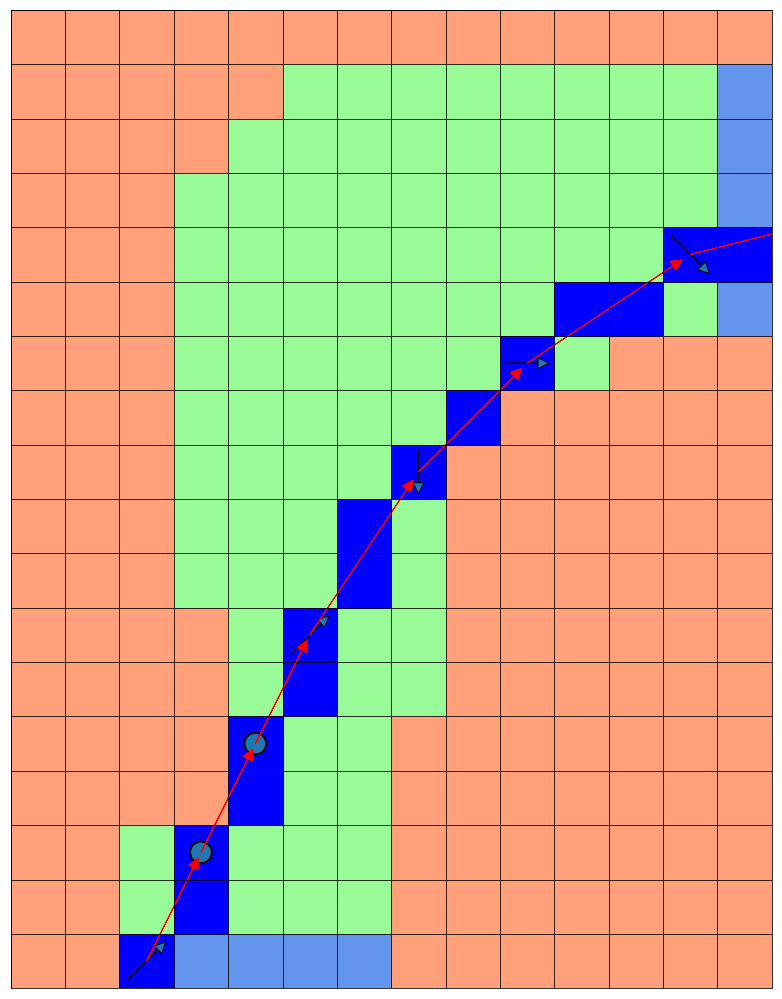

X Start is 3


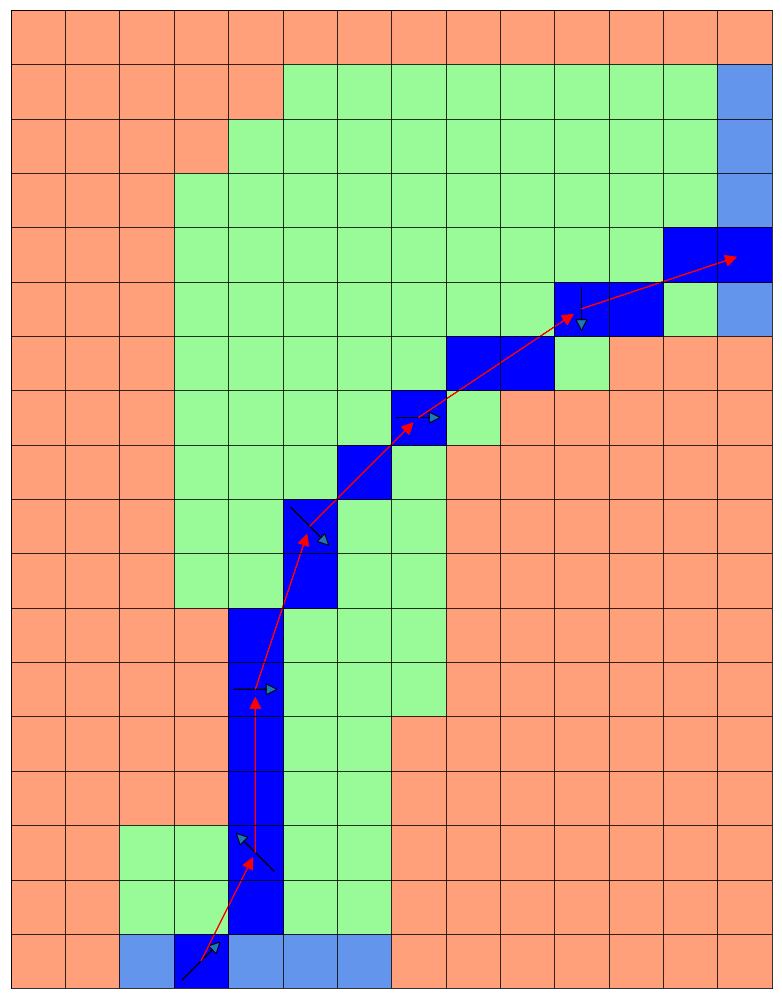

X Start is 4


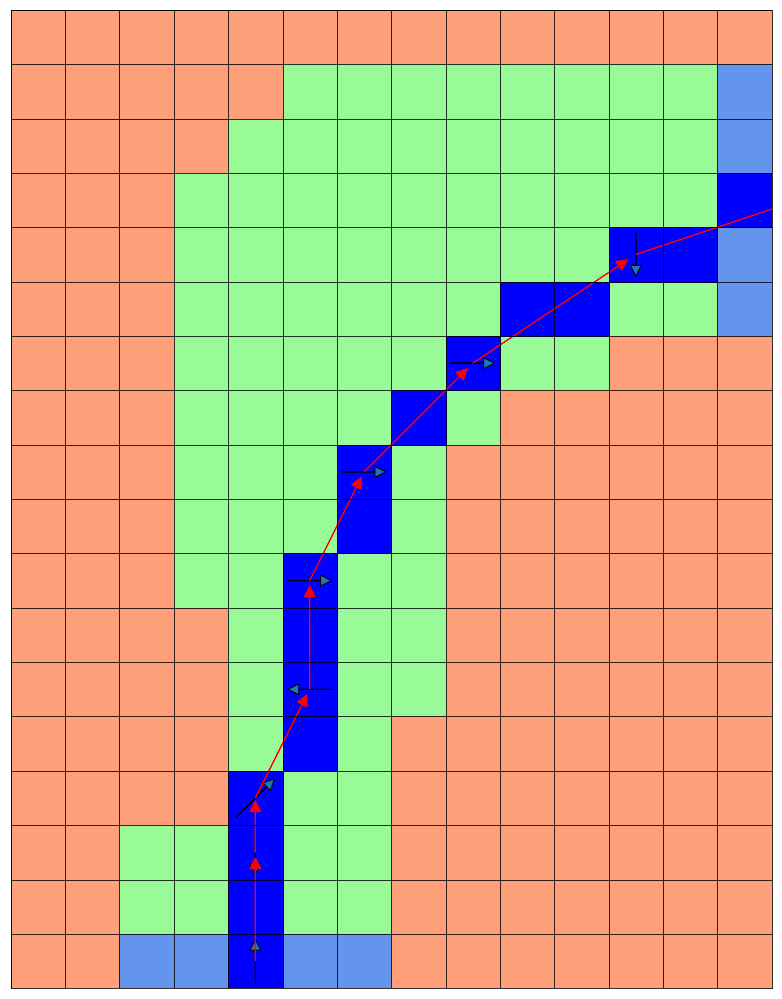

X Start is 5


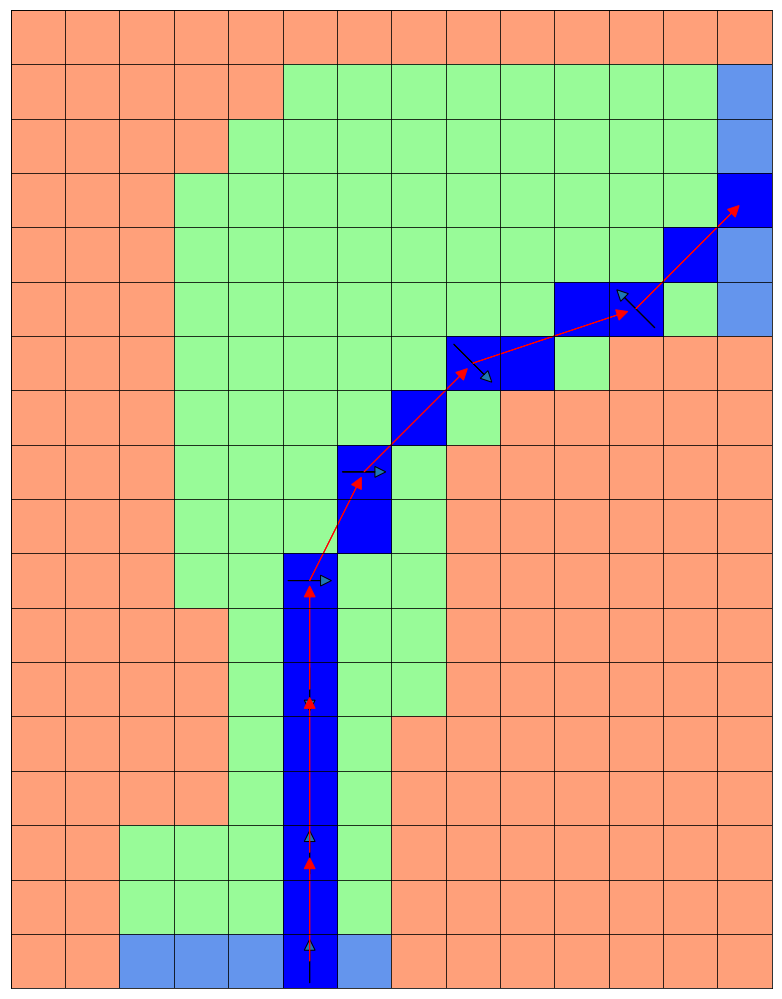

X Start is 6


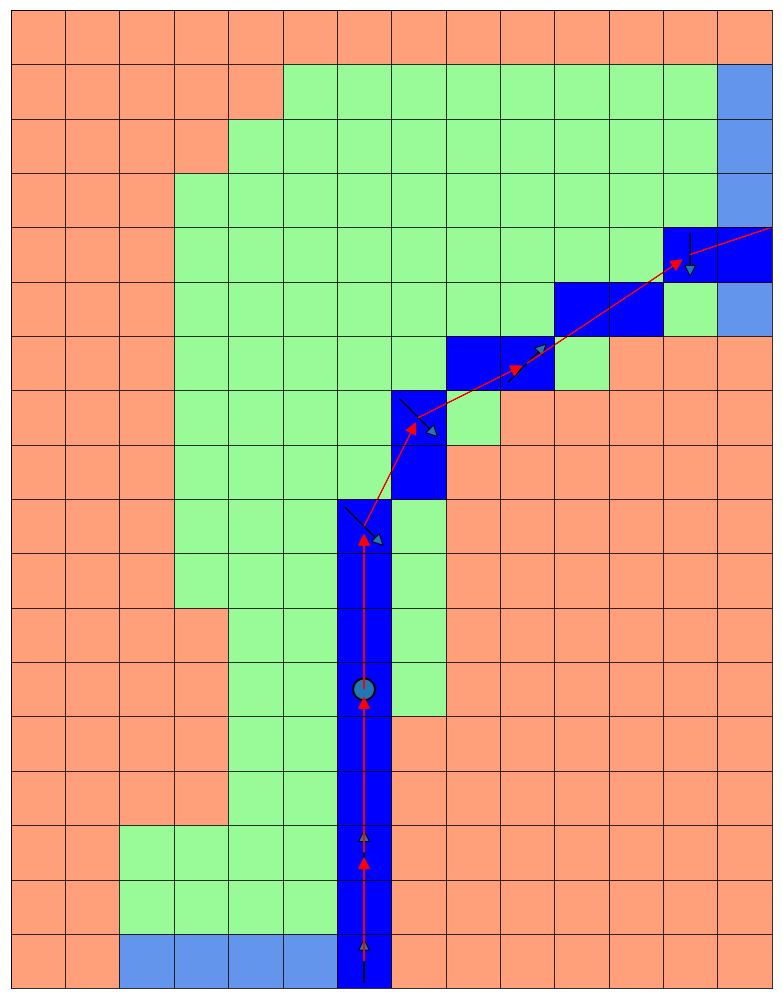

In [90]:
#Simulate episodes with diff starting by choosing policy that chooses the optimal Q value

for startXPosition in [2,3,4,5,6]:
    # create a racing environment
    racer = env()
    # reset the agent to one of the 4 starting cells at random
    # do this before each new episode
    racer.reset()
    # you can also manually set the agent position if you want to examine its behaviour there
    racer.setPosition(17,startXPosition)
    # create flag tracking whether the episode is over
    done = False

    # create lists to save the trajectory and the decisions of the agent
    actions = []
    moves = []
    velocities = []

    # these methods do what you would expect
    # v is an integer in [0, 35] representing a velocity
    # y, x are both integers, together, they represent the agents location
    v = racer.getVelocity()
    y, x = racer.getPosition()

    # simulate until the episode is over
    while not done:
        # which actions are possible at the current velocity?
        # the actions are integers in [0,8]
        possibleActions = racer.getAvailableActions()

        a = epsilonGreedy(Q,y,x,v,possibleActions,0) #Follow optimal action as given by Q values, epsilon = 0

        # save the action
        actions.append(a)
        # execute the action using the step function
        # y, x, v are new positions and velocities
        # done is the flag whether the episode is over
        # travel details exactly which cells the agent traveled through
        y, x, v, r, done, travel = racer.step(action = a)
        # save the velocities
        velocities.append(v)
        # save the cells that the agent most recently passed through
        # they are only needed for visualization
        moves.append(travel)

    # use the helper function to display how the episode went
    print(f'X Start is {startXPosition}')
    drawTrajectory(moves, actions, velocities)